___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Employee Churn Analysis Project***". This is the second project of Capstone Project Series, which you will be able to build your own classification models for a variety of business settings.

Also you will research what is Employee Churn?, How it is different from customer churn, Exploratory data analysis and visualization of employee churn dataset using ***matplotlib*** and ***seaborn***, model building and evaluation using python ***scikit-learn*** and ***Tensorflow-Keras*** packages.

You will be able to implement classification techniques in Python. Using Scikit-Learn allowing you to successfully make predictions with Distance Based, Bagging, Boosting algorithms for this project. On the other hand, for Deep Learning you will use Tensorflow-Keras.

At the end of the project, you will have the opportunity to deploy your model using *Streamlit*.

Before diving into the project, please take a look at the determines and project structure.

- NOTE: This project assumes that you already know the basics of coding in Python and are familiar with model deployement as well as the theory behind Distance Based, Bagging, Boosting algorithms, and Confusion Matrices. You can try more models and methods beside these to improve your model metrics.



# #Determines
In this project you have HR data of a company. A study is requested from you to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, you have two types of employee one who stayed and another who left the company.

You can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, you must use exploratory data analysis and data visualization techniques.

Then, you must perform data pre-processing operations such as ***Scaling*** and ***Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms.

You are asked to perform ***Cluster Analysis*** based on the information you obtain during exploratory data analysis and data visualization processes. The purpose of clustering analysis is to cluster data with similar characteristics.

Once the data is ready to be applied to the model, you must ***split the data into train and test***. Then build a model to predict whether employees will churn or not. Train your models with your train set, test the success of your model with your test set.

Try to make your predictions by using the *** Classification Algorithms***. You can use the related modules of the ***scikit-learn*** and ***Tensorflow-Keras*** library. You can use scikit-learn ***Classification Metrics*** module for accuracy calculation.

In the final step, you will deploy your model using Streamlit tool.



# #Tasks

#### 1. Exploratory Data Analysis
- EDA is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.
- In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics.

#### 2. Data Visualization
- Explore your data via visualizations to find-out:
 - What can be the reason of the churn?
 - Behavioral analysis of churns and not churns ..... etc.

#### 3. Cluster Analysis
- Apply ***clustering algorithms*** and writedown your conclusions about the clusters you created.

#### 5. Predictive Model Building
- Split Data as Train and Test set
- Built Classification Models(at least four models) and Evaluate Model Performances

#### 6. Model Deployement

- Save and Export the Best Model
- Deploy best model via Streamlit

## #Importing Modules and Predefined Functions#

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample
from numpy.random import uniform
from yellowbrick.cluster import SilhouetteVisualizer

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.utils import class_weight
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score, recall_score, precision_score, make_scorer, RocCurveDisplay, PrecisionRecallDisplay, average_precision_score, precision_recall_curve
from scikitplot.metrics import plot_roc, plot_precision_recall, silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

import tensorflow as tf
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

import pickle

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 1000)
pd.set_option("display.width", 1000)
%matplotlib inline

In [ ]:
SEED = 101

In [ ]:
if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("CPU will be used for this session.")

CPU will be used for this session.


In [ ]:
tf.keras.utils.set_random_seed(SEED)

In [ ]:
df = pd.read_csv("HR_Dataset.csv")

In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
def eval_metric_d(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train) >= 0.5
    y_pred = model.predict(X_test) >= 0.5

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
def hopkins(X, ratio=0.05):

    if not isinstance(X, np.ndarray):
      X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0] * ratio) #0.05 (5%) based on paper by Lawson and Jures

    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))

    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

## 1. Exploratory Data Analysis

In [ ]:
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  time_spend_company  Work_accident  left  promotion_last_5years Departments   salary
0                0.38             0.53               2                   157                   3              0     1                      0        sales     low
1                0.80             0.86               5                   262                   6              0     1                      0        sales  medium
2                0.11             0.88               7                   272                   4              0     1                      0        sales  medium
3                0.72             0.87               5                   223                   5              0     1                      0        sales     low
4                0.37             0.52               2                   159                   3              0     1                      0        sales     low

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
df.describe().T

count        mean        std    min     25%     50%     75%    max
satisfaction_level     14999.0    0.612834   0.248631   0.09    0.44    0.64    0.82    1.0
last_evaluation        14999.0    0.716102   0.171169   0.36    0.56    0.72    0.87    1.0
number_project         14999.0    3.803054   1.232592   2.00    3.00    4.00    5.00    7.0
average_montly_hours   14999.0  201.050337  49.943099  96.00  156.00  200.00  245.00  310.0
time_spend_company     14999.0    3.498233   1.460136   2.00    3.00    3.00    4.00   10.0
Work_accident          14999.0    0.144610   0.351719   0.00    0.00    0.00    0.00    1.0
left                   14999.0    0.238083   0.425924   0.00    0.00    0.00    0.00    1.0
promotion_last_5years  14999.0    0.021268   0.144281   0.00    0.00    0.00    0.00    1.0

In [ ]:
df.shape

(14999, 10)

In [ ]:
df.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
Departments               10
salary                     3
dtype: int64

In [ ]:
df.duplicated().value_counts()

False    11991
True      3008
Name: count, dtype: int64

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().value_counts()

False    11991
Name: count, dtype: int64

In [ ]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

In [ ]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Departments ', 'salary'], dtype='object')
Numerical Variables:
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']


In [ ]:
categorical_columns = df.select_dtypes(include=['object'])
# Looping through each categorical column
for column in categorical_columns:
    print(f"Column: {column}")
    print(f"Count: {df[column].count()}")  # Count of non-null values in the column
    print(f"Top: {df[column].value_counts().idxmax()}")  # Most frequent value
    print(f"Freq: {df[column].value_counts().max()}")  # Frequency of the most frequent value
    print(f"Unique: {df[column].nunique()}")  # Number of unique values
    print("----------------------------------------")

Column: Departments 
Count: 11991
Top: sales
Freq: 3239
Unique: 10
----------------------------------------
Column: salary
Count: 11991
Top: low
Freq: 5740
Unique: 3
----------------------------------------


In [ ]:
numerical_columns = df.select_dtypes(include=np.number)
# Looping through each numerical column
for column in numerical_columns:
    print(f"Column: {column}")
    print(f"Count: {df[column].count()}")  # Count of non-null values in the column
    print(f"Top: {df[column].value_counts().idxmax()}")  # Most frequent value
    print(f"Freq: {df[column].value_counts().max()}")  # Frequency of the most frequent value
    print(f"Unique: {df[column].nunique()}")  # Number of unique values
    print("----------------------------------------")

Column: satisfaction_level
Count: 11991
Top: 0.74
Freq: 214
Unique: 92
----------------------------------------
Column: last_evaluation
Count: 11991
Top: 0.55
Freq: 281
Unique: 65
----------------------------------------
Column: number_project
Count: 11991
Top: 4
Freq: 3685
Unique: 6
----------------------------------------
Column: average_montly_hours
Count: 11991
Top: 156
Freq: 112
Unique: 215
----------------------------------------
Column: time_spend_company
Count: 11991
Top: 3
Freq: 5190
Unique: 8
----------------------------------------
Column: Work_accident
Count: 11991
Top: 0
Freq: 10141
Unique: 2
----------------------------------------
Column: left
Count: 11991
Top: 0
Freq: 10000
Unique: 2
----------------------------------------
Column: promotion_last_5years
Count: 11991
Top: 0
Freq: 11788
Unique: 2
----------------------------------------


In [ ]:
df.rename({'Departments ':'Department'}, axis=1, inplace=True)

In [ ]:
print("the percentage of the churn employees(0: stayed, 1: left)")
for i in sorted(df["left"].unique(),reverse=True):
        print('the percentage of %s: %%%.2f' % (i, 100*df["left"].value_counts()[i]/len(df)))

the percentage of the churn employees(0: stayed, 1: left)
the percentage of 1: %16.60
the percentage of 0: %83.40


In [ ]:
df["left"].value_counts()

left
0    10000
1     1991
Name: count, dtype: int64

In [ ]:
# divide the data for analysis
df_left = df[df["left"] == 1].drop(columns="left")
df_stay = df[df["left"] == 0].drop(columns="left")

In [ ]:
df_left.groupby("Department")[["satisfaction_level", "last_evaluation", "number_project", "average_montly_hours", "time_spend_company", "Work_accident", "promotion_last_5years"]].mean().T

Department                     IT       RandD  accounting          hr  management   marketing  product_mng       sales     support   technical
satisfaction_level       0.417089    0.433529    0.414679    0.422478    0.435962    0.454375     0.467909    0.450400    0.451506    0.428897
last_evaluation          0.715759    0.746471    0.714037    0.678673    0.723077    0.697589     0.719000    0.716236    0.737276    0.736487
number_project           3.930380    4.047059    3.954128    3.539823    4.076923    3.660714     3.800000    3.763636    3.967949    4.071795
average_montly_hours   209.537975  212.741176  209.541284  197.053097  207.615385  202.142857   205.972727  206.270909  208.102564  214.574359
time_spend_company       3.835443    4.000000    3.871560    3.707965    3.730769    3.883929     3.936364    3.820000    3.958333    3.956410
Work_accident            0.044304    0.082353    0.045872    0.044248    0.076923    0.035714     0.045455    0.056364    0.057692    0.048718
promotion_last_5years    0.012658    0.000000    0.000000    0.000000    0.019231    0.000000     0.000000    0.005455    0.003205    0.002564

In [ ]:
# salaries count by department
df_left.groupby("Department")["salary"].value_counts()

Department   salary
IT           low        87
             medium     67
             high        4
RandD        low        51
             medium     31
             high        3
accounting   low        59
             medium     47
             high        3
hr           low        62
             medium     48
             high        3
management   low        32
             medium     19
             high        1
marketing    low        76
             medium     33
             high        3
product_mng  low        59
             medium     47
             high        4
sales        low       319
             medium    219
             high       12
support      low       191
             medium    116
             high        5
technical    low       238
             medium    142
             high       10
Name: count, dtype: int64

In [ ]:
df_stay.groupby("Department")[["satisfaction_level", "last_evaluation", "number_project", "average_montly_hours", "time_spend_company", "Work_accident", "promotion_last_5years"]].mean().T

Department                     IT       RandD  accounting          hr  management   marketing  product_mng       sales     support   technical
satisfaction_level       0.675917    0.654204    0.649082    0.668135    0.658542    0.670784     0.660747    0.668360    0.672724    0.669806
last_evaluation          0.714914    0.708309    0.723574    0.724262    0.726745    0.722602     0.712795    0.709204    0.720046    0.716278
number_project           3.771394    3.822660    3.808594    3.706967    3.804688    3.732620     3.793403    3.779844    3.790590    3.814455
average_montly_hours   198.919315  199.692939  199.033203  199.907787  200.705729  198.957219   197.541667  199.008925  199.081511  198.284250
time_spend_company       3.256724    3.224959    3.304688    3.151639    4.015625    3.329768     3.227431    3.290814    3.155070    3.173139
Work_accident            0.161369    0.183908    0.160156    0.153689    0.177083    0.185383     0.180556    0.173671    0.186216    0.172600
promotion_last_5years    0.000000    0.034483    0.019531    0.022541    0.091146    0.048128     0.000000    0.020454    0.009940    0.011327

In [ ]:
# salaries count by department
df_stay.groupby("Department")["salary"].value_counts()

Department   salary
IT           low        389
             medium     362
             high        67
RandD        medium     294
             low        271
             high        44
accounting   low        237
             medium     215
             high        60
hr           low        234
             medium     219
             high        35
management   medium     150
             high       127
             low        107
marketing    medium     268
             low        234
             high        59
product_mng  low        284
             medium     244
             high        48
sales        low       1234
             medium    1230
             high       225
support      medium     712
             low        676
             high       121
technical    low        900
             medium     798
             high       156
Name: count, dtype: int64

In [ ]:
df_left.groupby("salary")[["satisfaction_level", "last_evaluation", "number_project", "average_montly_hours", "time_spend_company", "Work_accident", "promotion_last_5years"]].mean().T

salary                       high         low      medium
satisfaction_level       0.437500    0.440630    0.439896
last_evaluation          0.682708    0.721567    0.724551
number_project           3.750000    3.864566    3.920676
average_montly_hours   202.979167  207.324532  209.764629
time_spend_company       3.812500    3.878194    3.890767
Work_accident            0.000000    0.048552    0.062419
promotion_last_5years    0.000000    0.004259    0.003901

In [ ]:
df_stay.groupby("salary")[["satisfaction_level", "last_evaluation", "number_project", "average_montly_hours", "time_spend_company", "Work_accident", "promotion_last_5years"]].mean().T

salary                       high         low      medium
satisfaction_level       0.653832    0.669457    0.668077
last_evaluation          0.708068    0.717727    0.715167
number_project           3.794055    3.785589    3.786509
average_montly_hours   199.919321  198.668857  199.016251
time_spend_company       3.477707    3.176084    3.304096
Work_accident            0.165605    0.182216    0.168522
promotion_last_5years    0.046709    0.007227    0.026269

In [ ]:
df_left[["satisfaction_level", "last_evaluation", "number_project", "average_montly_hours", "time_spend_company", "Work_accident", "promotion_last_5years"]].mean()

satisfaction_level         0.440271
last_evaluation            0.721783
number_project             3.883476
average_montly_hours     208.162230
time_spend_company         3.881467
Work_accident              0.052737
promotion_last_5years      0.004018
dtype: float64

In [ ]:
df_left["salary"].value_counts()

salary
low       1174
medium     769
high        48
Name: count, dtype: int64

In [ ]:
df_stay[["satisfaction_level", "last_evaluation", "number_project", "average_montly_hours", "time_spend_company", "Work_accident", "promotion_last_5years"]].mean()

satisfaction_level         0.667365
last_evaluation            0.715667
number_project             3.786800
average_montly_hours     198.942700
time_spend_company         3.262000
Work_accident              0.174500
promotion_last_5years      0.019500
dtype: float64

In [ ]:
# employees who left have lower average satisfaction and higher average monthly hours than the employees who stayed

In [ ]:
df_stay["salary"].value_counts()

salary
low       4566
medium    4492
high       942
Name: count, dtype: int64

In [ ]:
df.groupby("left")["salary"].value_counts() / df.groupby("left")["salary"].value_counts().groupby("left").sum()

left  salary
0     low       0.456600
      medium    0.449200
      high      0.094200
1     low       0.589653
      medium    0.386238
      high      0.024108
Name: count, dtype: float64

In [ ]:
# employees who left most of them have low salary

In [ ]:
df.groupby('left')['Work_accident'].value_counts()

left  Work_accident
0     0                8255
      1                1745
1     0                1886
      1                 105
Name: count, dtype: int64

In [ ]:
# low number of employees who had an accident and left

In [ ]:
df['Department'].value_counts()

Department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

In [ ]:
df_left['Department'].value_counts()

Department
sales          550
technical      390
support        312
IT             158
hr             113
marketing      112
product_mng    110
accounting     109
RandD           85
management      52
Name: count, dtype: int64

In [ ]:
# the highest number of employees who left are in sales, technichal, and support
# the least number of employees who left are in management and RandD

In [ ]:
df_stay['Department'].value_counts()

Department
sales          2689
technical      1854
support        1509
IT              818
RandD           609
product_mng     576
marketing       561
accounting      512
hr              488
management      384
Name: count, dtype: int64

## 2. Data Visualization

<Axes: >

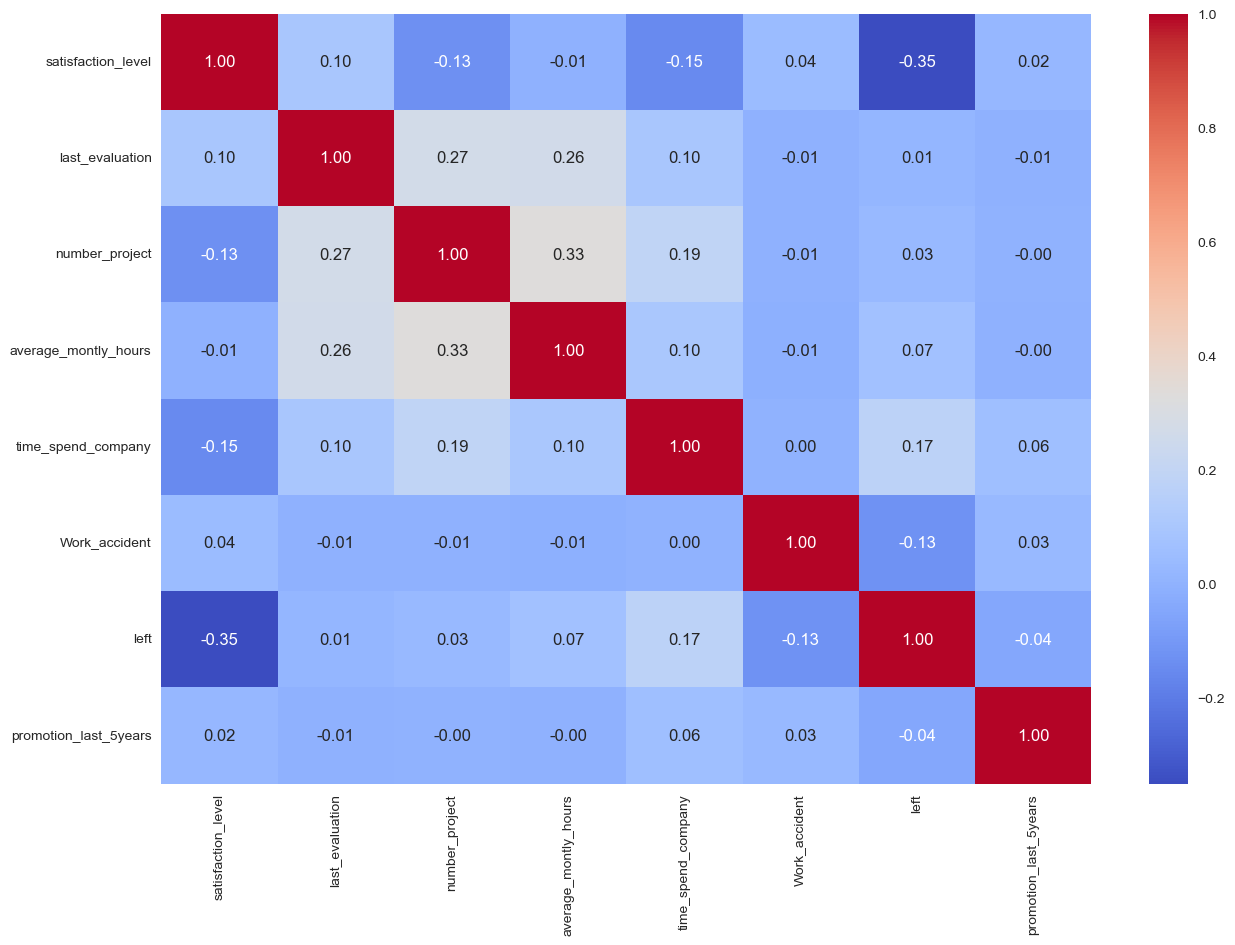

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True, cmap="coolwarm", fmt=".2f")

In [ ]:
# + correlation between last_evaluation and both number_project and average_monthly_hours
# + correlation between number_project and average_monthly_hours
# which means the evaluation increases the more work the employees do
# - correlation between left and satisfaction_level
# which means when the satisfaction decreases the more employees leave

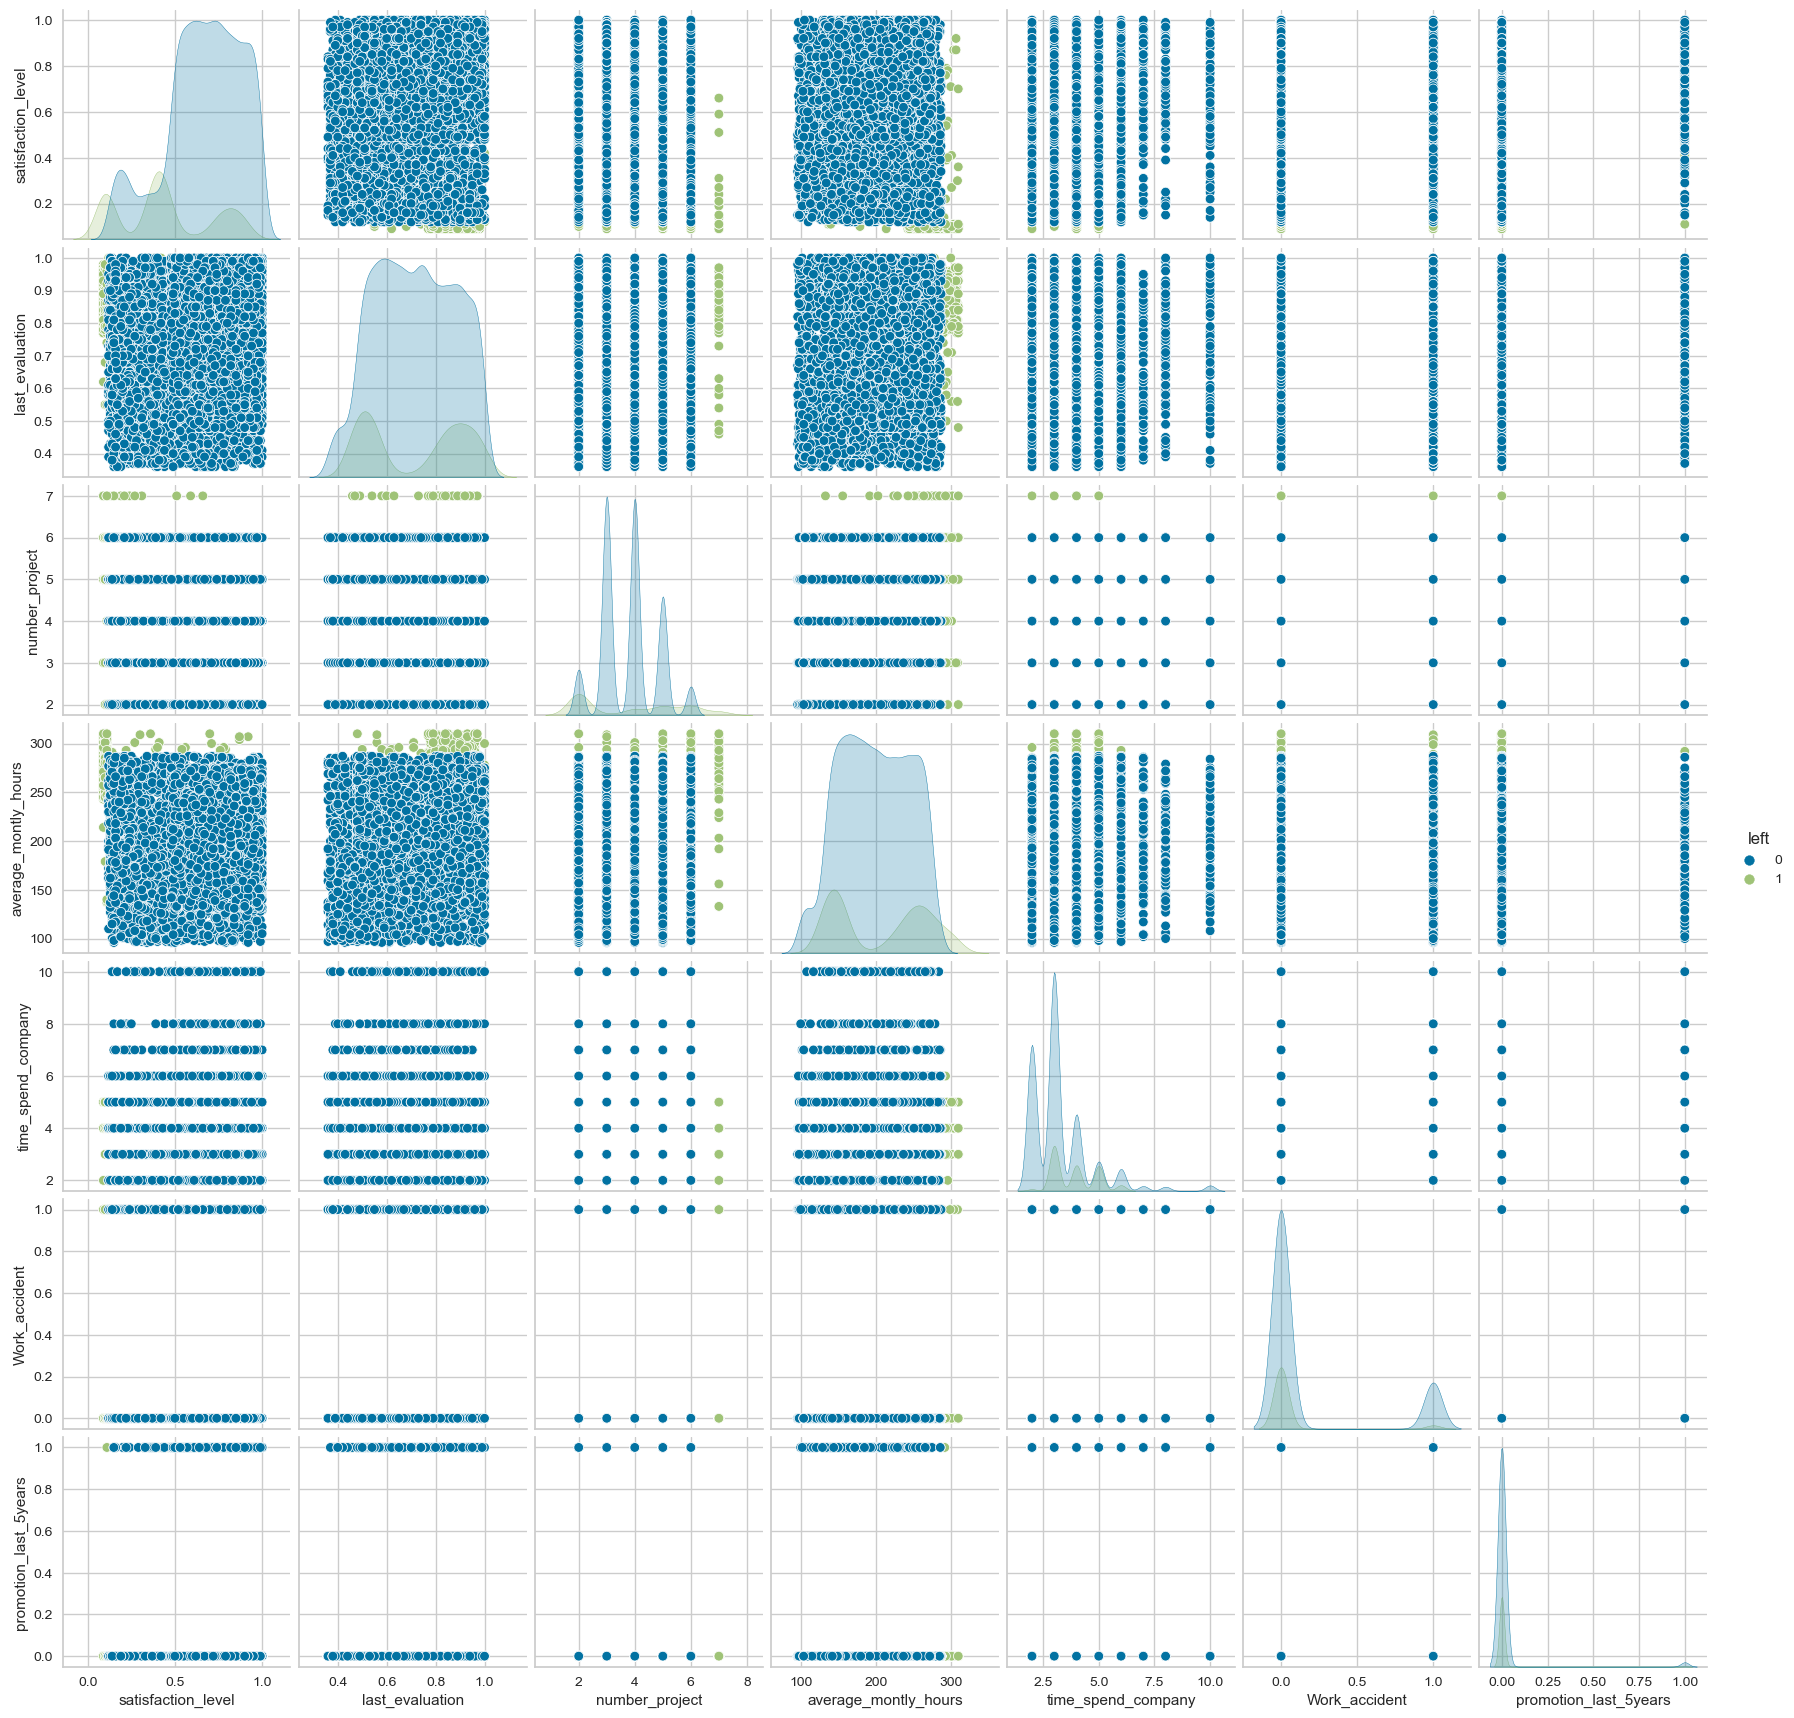

In [ ]:
sns.pairplot(df, hue="left")

Categorical Variables:
Index(['Department', 'salary'], dtype='object')
Numerical Variables:
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']
satisfaction_level
Skew : -0.54


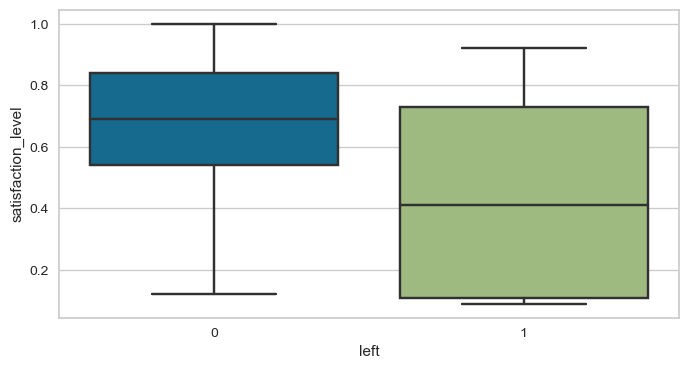

last_evaluation
Skew : -0.03


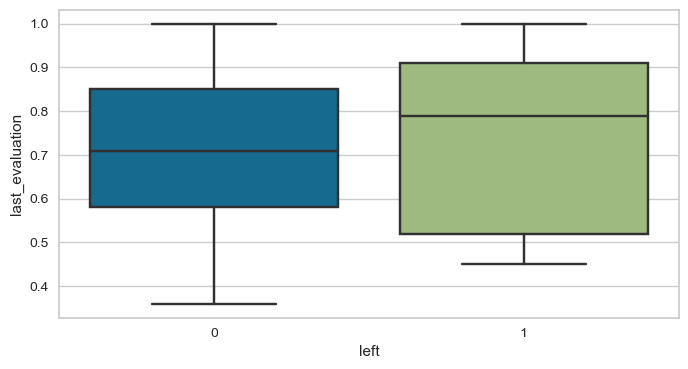

number_project
Skew : 0.33


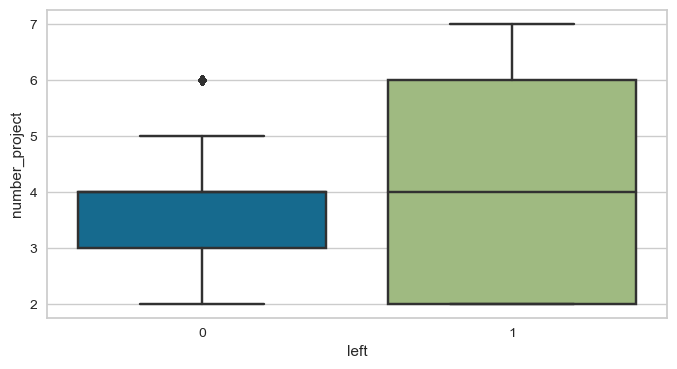

average_montly_hours
Skew : 0.03


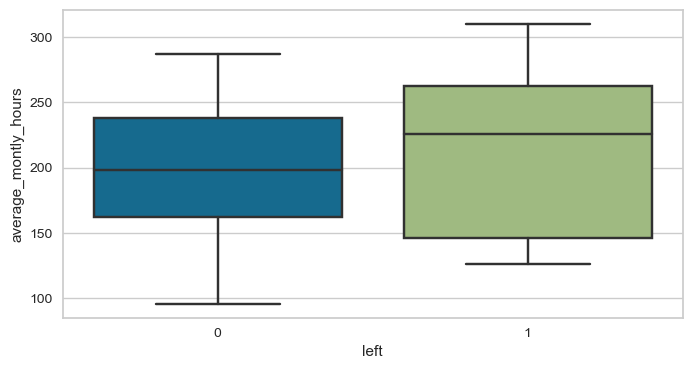

time_spend_company
Skew : 1.82


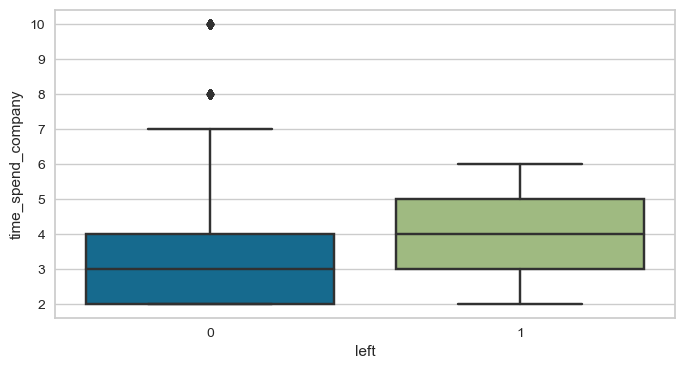

Work_accident
Skew : 1.91


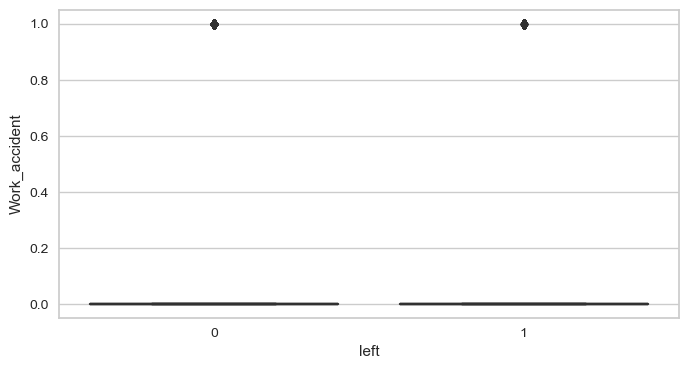

promotion_last_5years
Skew : 7.49


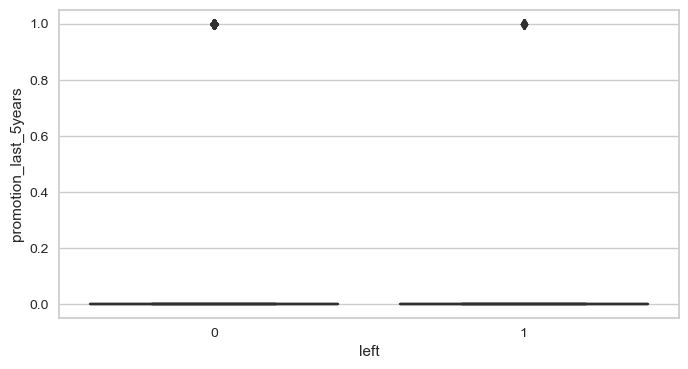

In [ ]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).drop(columns="left").columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)


for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (8, 4))
    sns.boxplot(x=df["left"], y=df[col])
    plt.show()

Categorical Variables:
Index(['Department', 'salary'], dtype='object')
Numerical Variables:
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']
satisfaction_level
Skew : -0.54


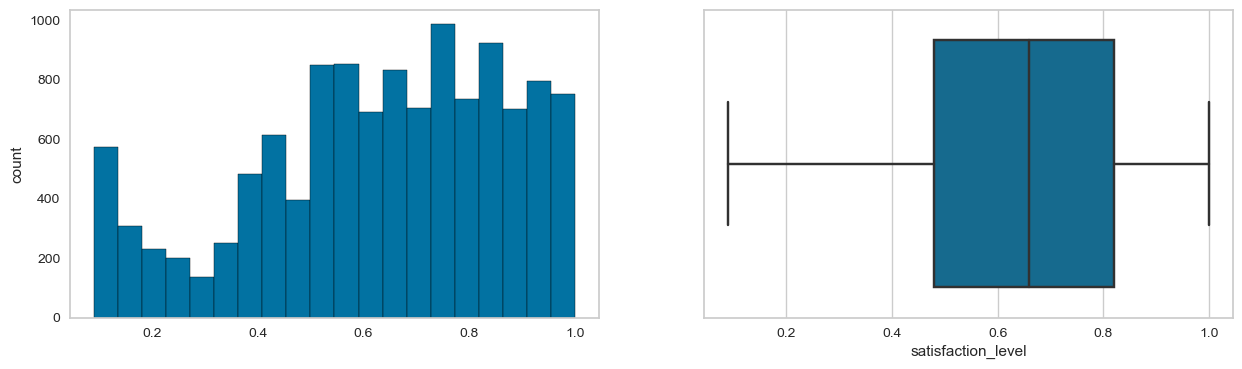

last_evaluation
Skew : -0.03


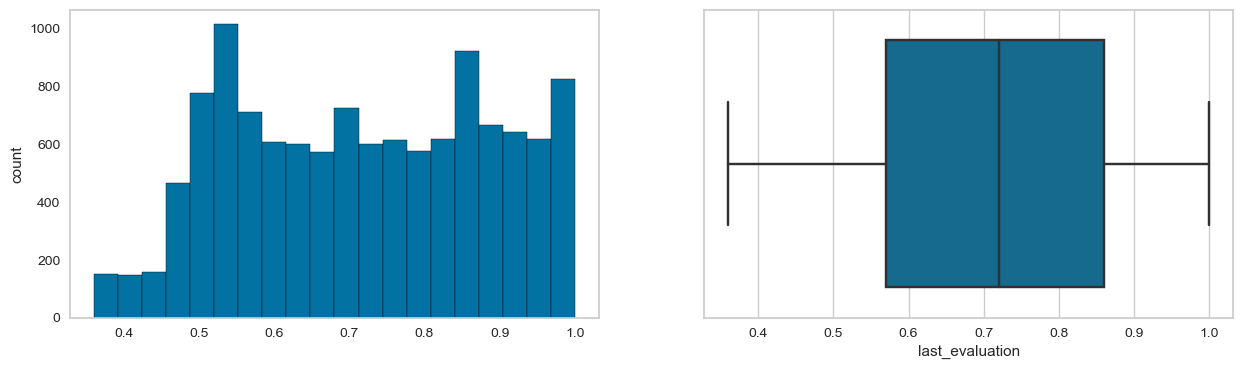

number_project
Skew : 0.33


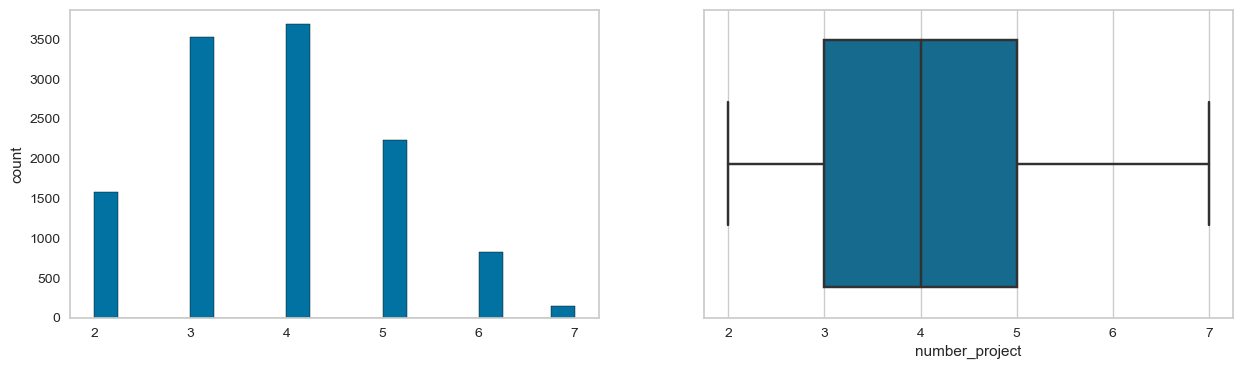

average_montly_hours
Skew : 0.03


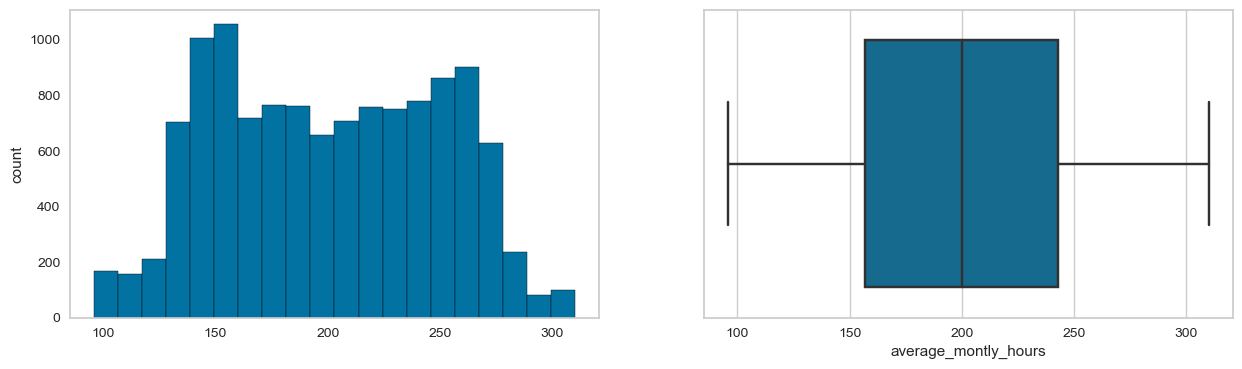

time_spend_company
Skew : 1.82


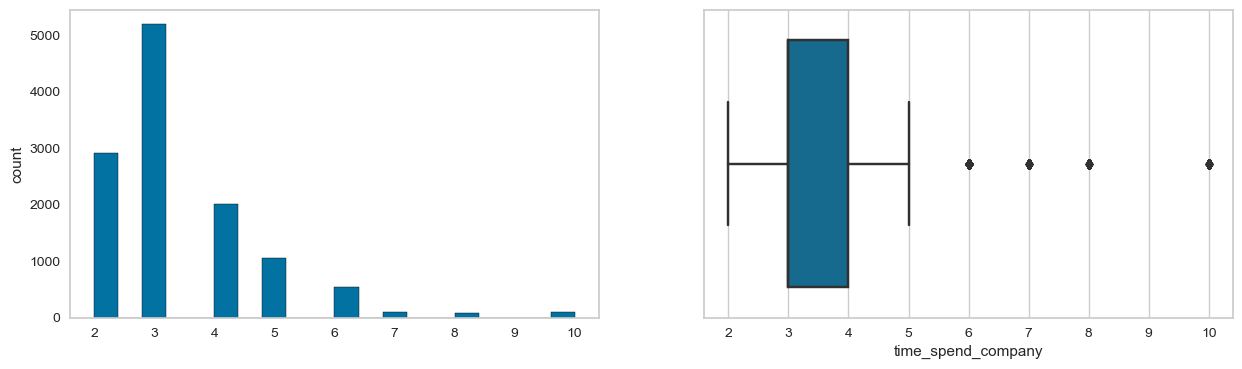

Work_accident
Skew : 1.91


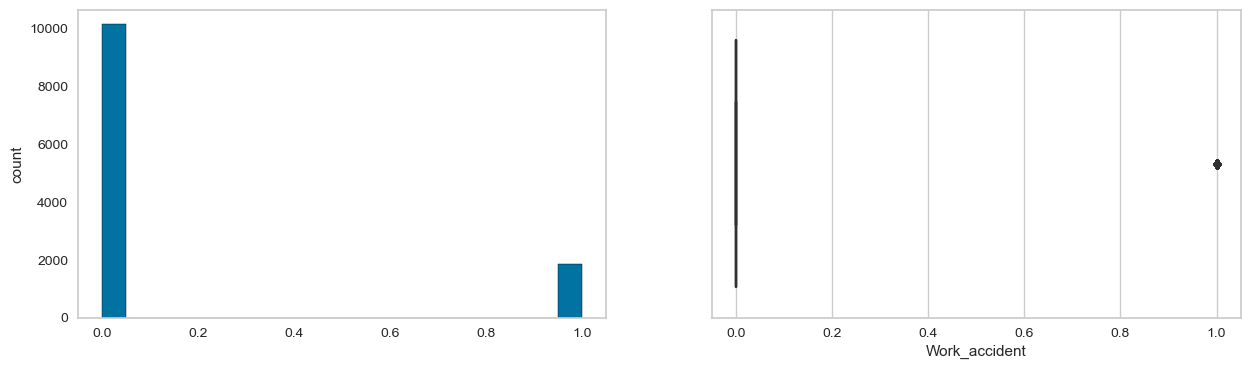

left
Skew : 1.8


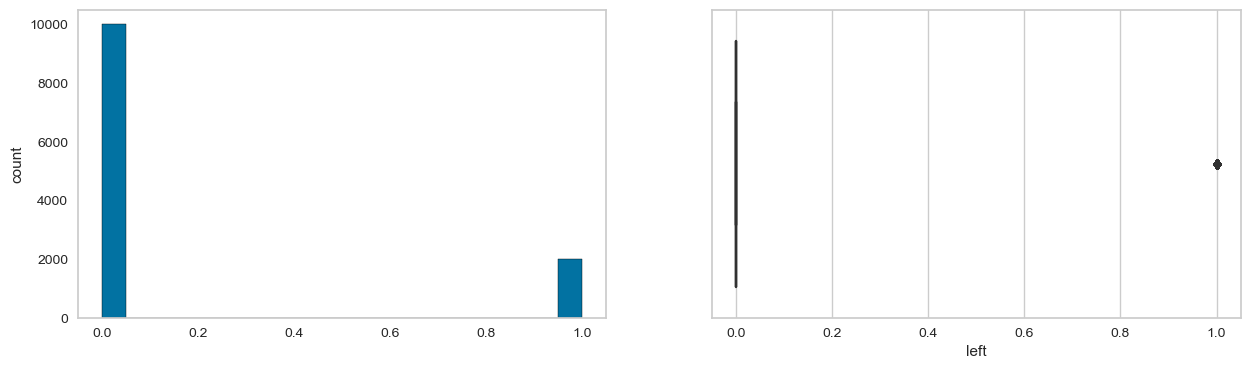

promotion_last_5years
Skew : 7.49


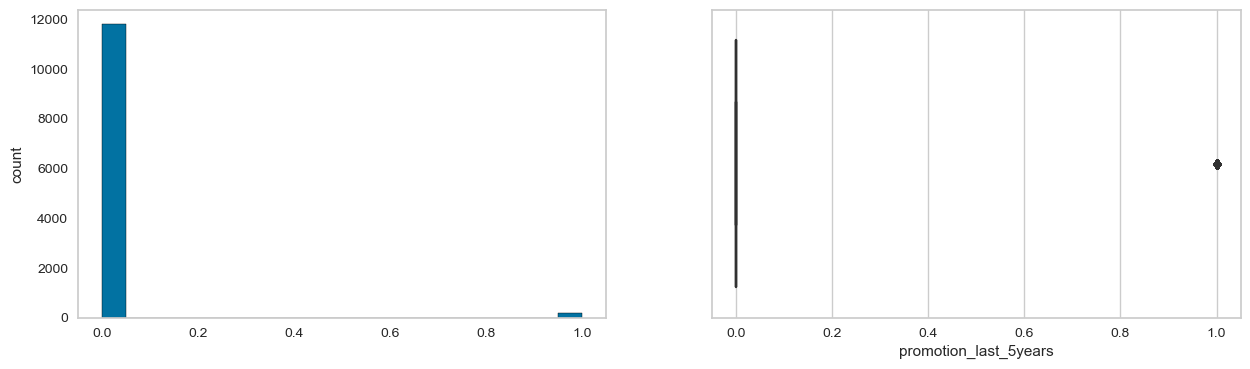

In [ ]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)


for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False, bins=20, edgecolor='black')
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

In [ ]:
# we are not considering time_spend_company outliers because it reperesents valid data

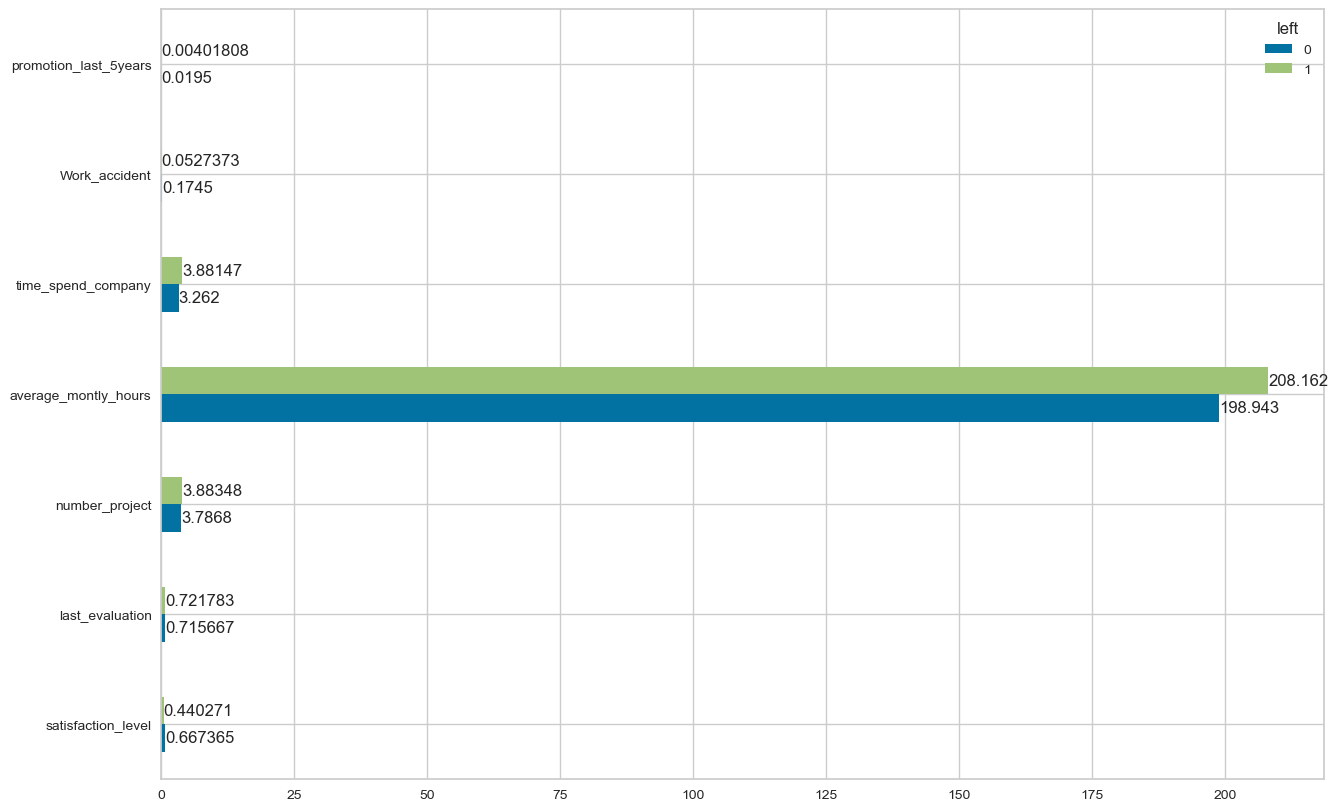

In [ ]:
ax = df.groupby("left")[["satisfaction_level", "last_evaluation", "number_project", "average_montly_hours", "time_spend_company", "Work_accident", "promotion_last_5years"]].mean().T.plot(kind="barh", figsize=(15, 10))
for i in ax.containers:
 ax.bar_label(i)

In [ ]:
# employee who left have higher average_monthly_hours

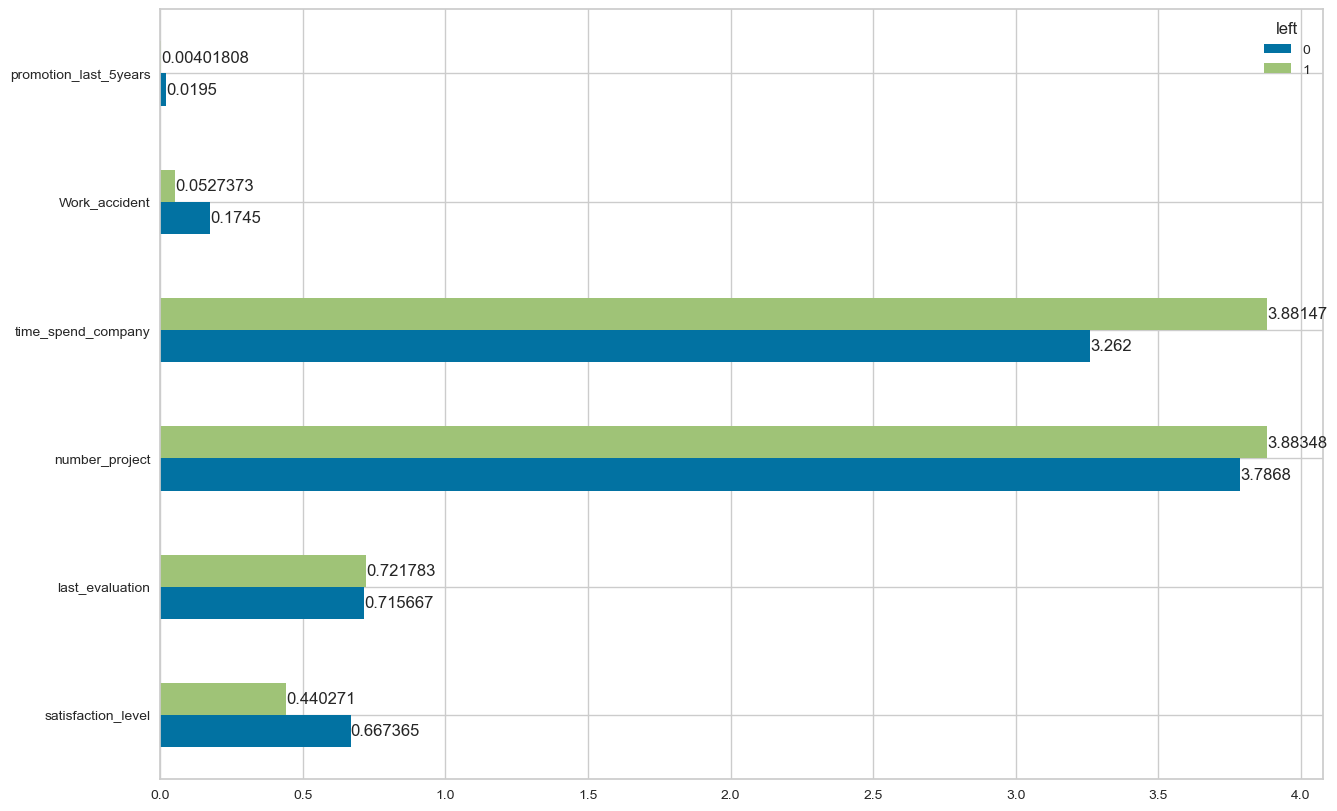

In [ ]:
ax = df.groupby("left")[["satisfaction_level", "last_evaluation", "number_project", "time_spend_company", "Work_accident", "promotion_last_5years"]].mean().T.plot(kind="barh", figsize=(15, 10))
for i in ax.containers:
 ax.bar_label(i)

In [ ]:
# employees who left have higher time_spend_company and number_project and lower satisfaction_level

In [ ]:
salary_per_v = (df.groupby("left")["salary"].value_counts() / df.groupby("left")["salary"].value_counts().groupby("left").sum()).rename("percent").reset_index()

In [ ]:
salary_per_v = salary_per_v.pivot(index="left", columns="salary", values= "percent")

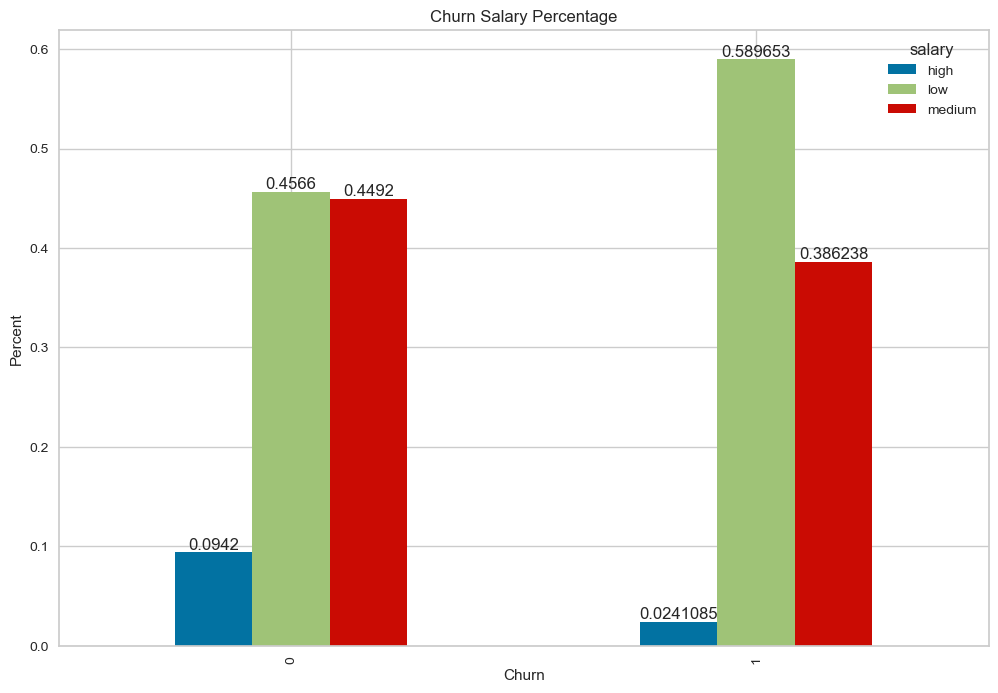

In [ ]:
ax = salary_per_v.plot(kind="bar", figsize=(12, 8))

# Set plot labels and title
plt.xlabel('Churn')
plt.ylabel('Percent')
plt.title('Churn Salary Percentage')

# Show the plot
for i in ax.containers:
 ax.bar_label(i)
plt.show()

In [ ]:
# it seems that most the employees who left work the longest hours, have more project, have the highest time spent in the company, and the lowest salary
# that may be the reason for the low satisfaction

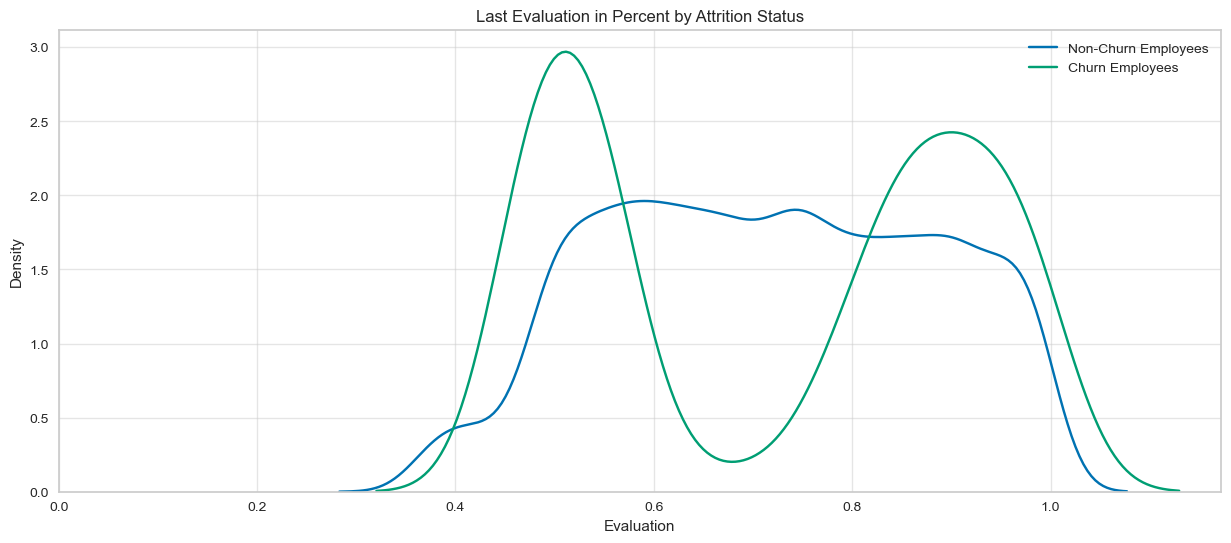

In [ ]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_stay['last_evaluation'], label = 'Non-Churn Employees')
sns.kdeplot(df_left['last_evaluation'], label = 'Churn Employees')
plt.xlabel('Evaluation')
plt.xlim(left=0)
plt.legend()
plt.ylabel('Density')
plt.title('Last Evaluation in Percent by Attrition Status');

In [ ]:
# we notice that the employees who left are mostly in between (0.4, 0.6) and (0.8, 1)

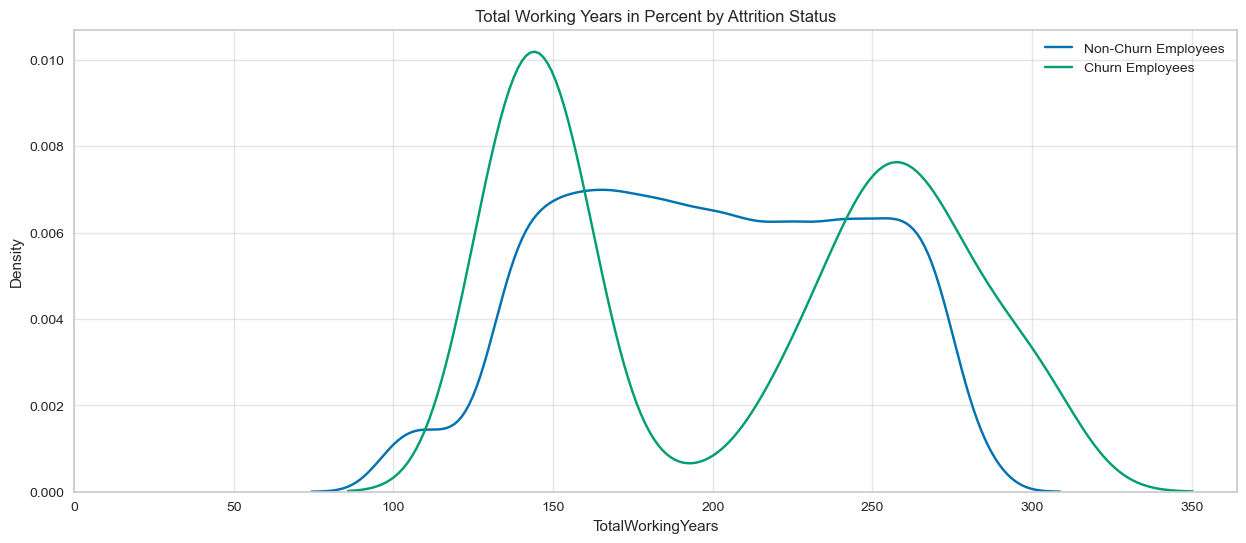

In [ ]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_stay['average_montly_hours'], label = 'Non-Churn Employees')
sns.kdeplot(df_left['average_montly_hours'], label = 'Churn Employees')
plt.xlabel('TotalWorkingYears')
plt.xlim(left=0)
plt.legend()
plt.ylabel('Density')
plt.title('Total Working Years in Percent by Attrition Status');

In [ ]:
# have similar distribution with evaluation
# we notice that the employees who left are mostly in between (125, 175) and (225, 300)

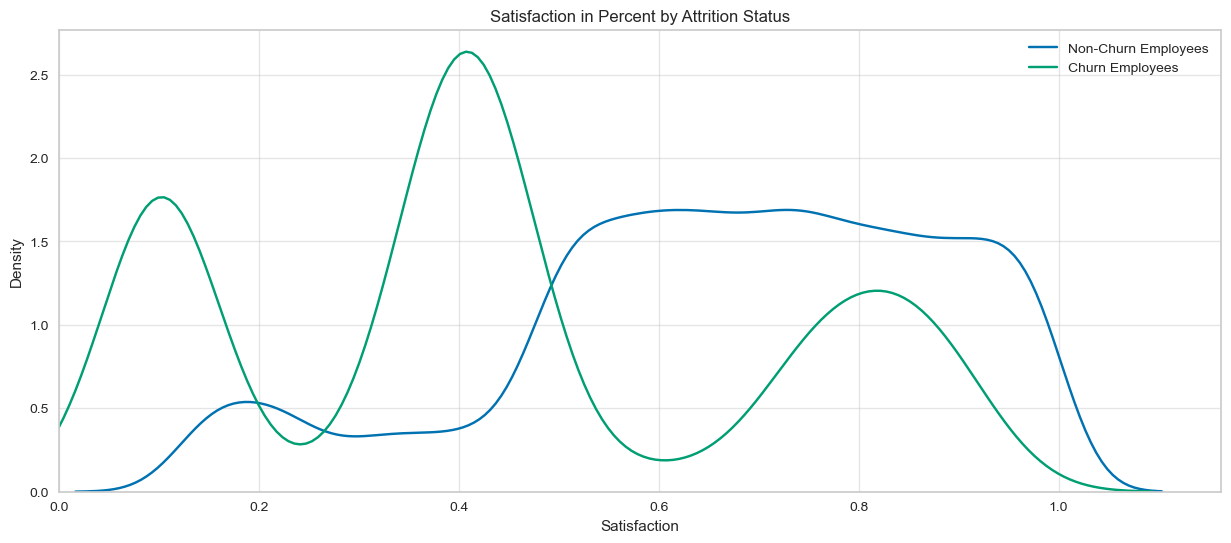

In [ ]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_stay['satisfaction_level'], label = 'Non-Churn Employees')
sns.kdeplot(df_left['satisfaction_level'], label = 'Churn Employees')
plt.xlabel('Satisfaction')
plt.xlim(left=0)
plt.legend()
plt.ylabel('Density')
plt.title('Satisfaction in Percent by Attrition Status');

In [ ]:
# we notice that the employees who left are mostly in between (0, 0.2), (0.3, 0.5), and (0.7, 0.9)
# the employees who stayed are mostly in between (0.7, 1)

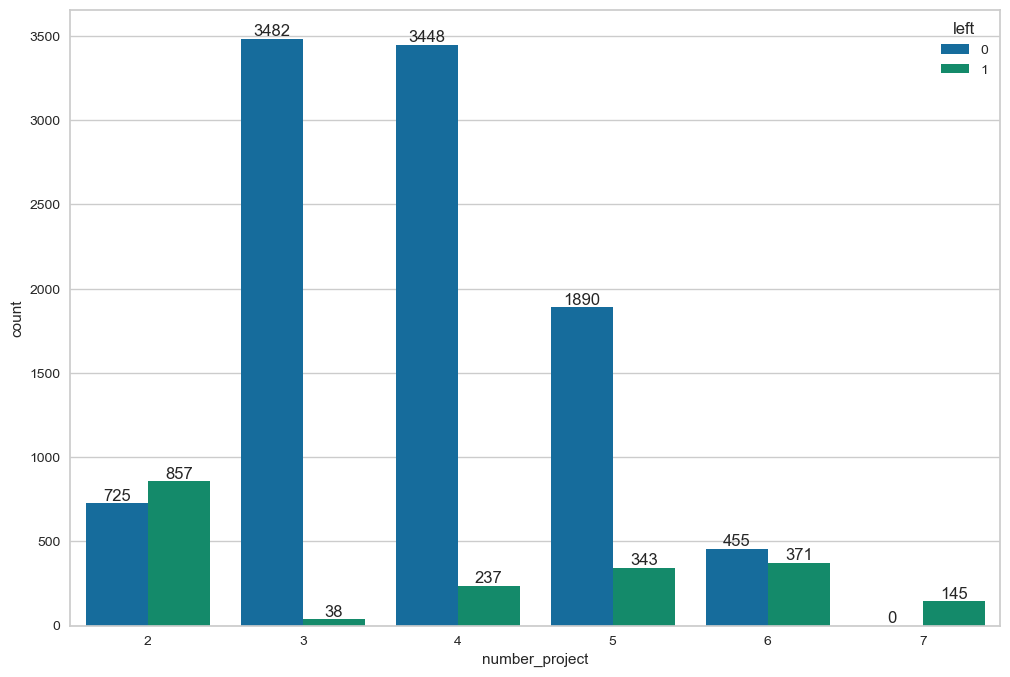

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x='number_project', data=df, hue='left')
for i in ax.containers:
 ax.bar_label(i)

In [ ]:
# all employees who did 7 project left
# employees who left with number of projects 2 and 6 are higher then half who stayed

<Axes: xlabel='number_project', ylabel='average_montly_hours'>

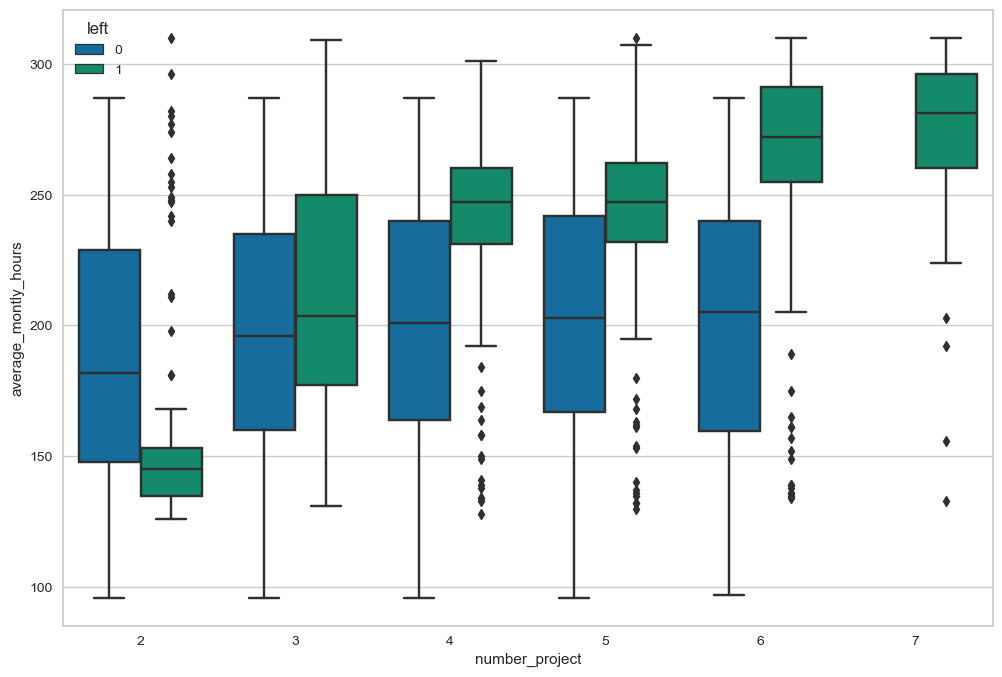

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="number_project", y="average_montly_hours", hue="left", data=df)

In [ ]:
# for employees who left the average_monthly_hours are increasing with the number of projects to be higher then the employees who stayed
# for employees who stayed the average_monthly_hours are similar to each other and doesn't change much with the number of projects and it is lower then the employees who left

<Axes: xlabel='number_project', ylabel='last_evaluation'>

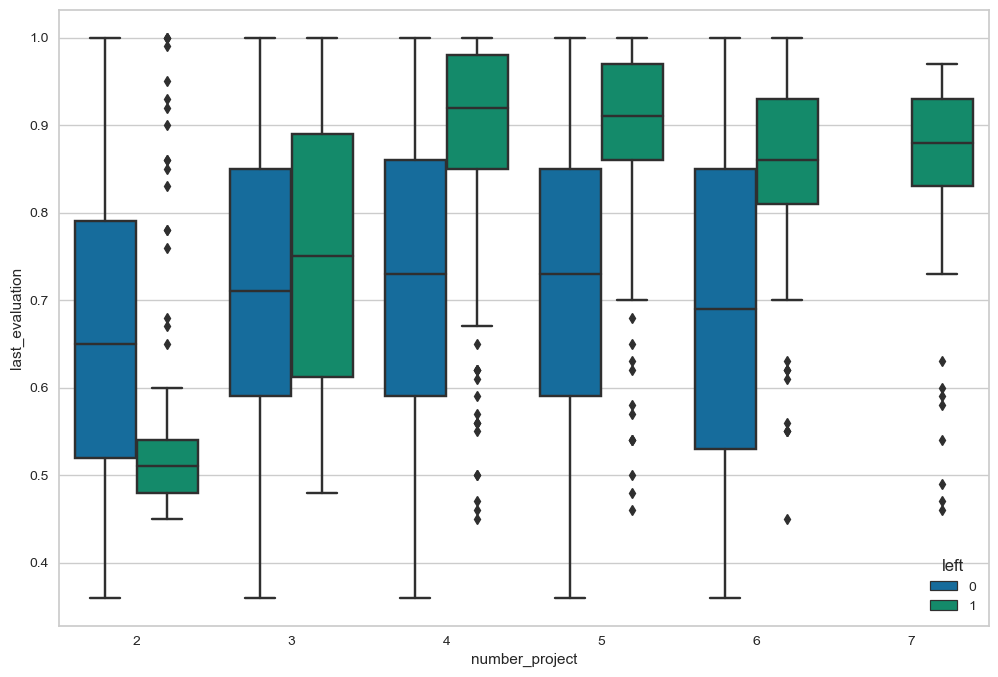

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="number_project", y="last_evaluation", hue="left", data=df)

In [ ]:
# similar to the distribution of average_monthly_hours
# for employees who left the last_evaluation are increasing with the number of projects to be higher then the employees who stayed
# for employees who stayed the last_evaluation are similar to each other and doesn't change much with the number of projects and it is lower then the employees who left

<Axes: xlabel='number_project', ylabel='satisfaction_level'>

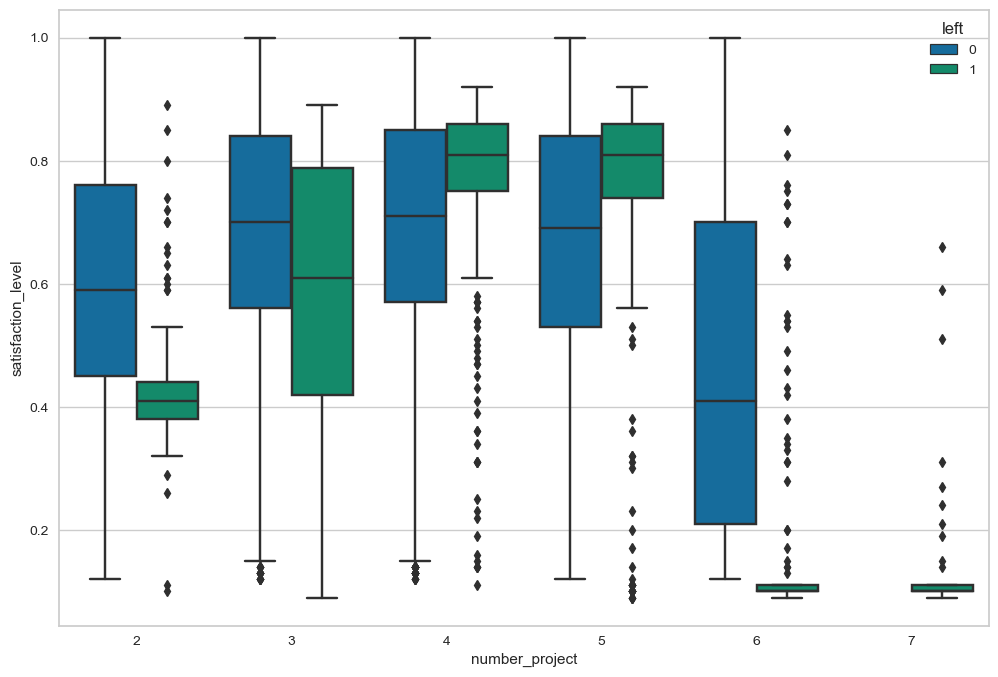

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="number_project", y="satisfaction_level", hue="left", data=df)

In [ ]:
# for employees who left the satisfaction_level are the lowest at number of project 2, 6, and 7
# for employees who stayed the satisfaction_level are similar to each other and doesn't change much with the number of projects except for number of project 6

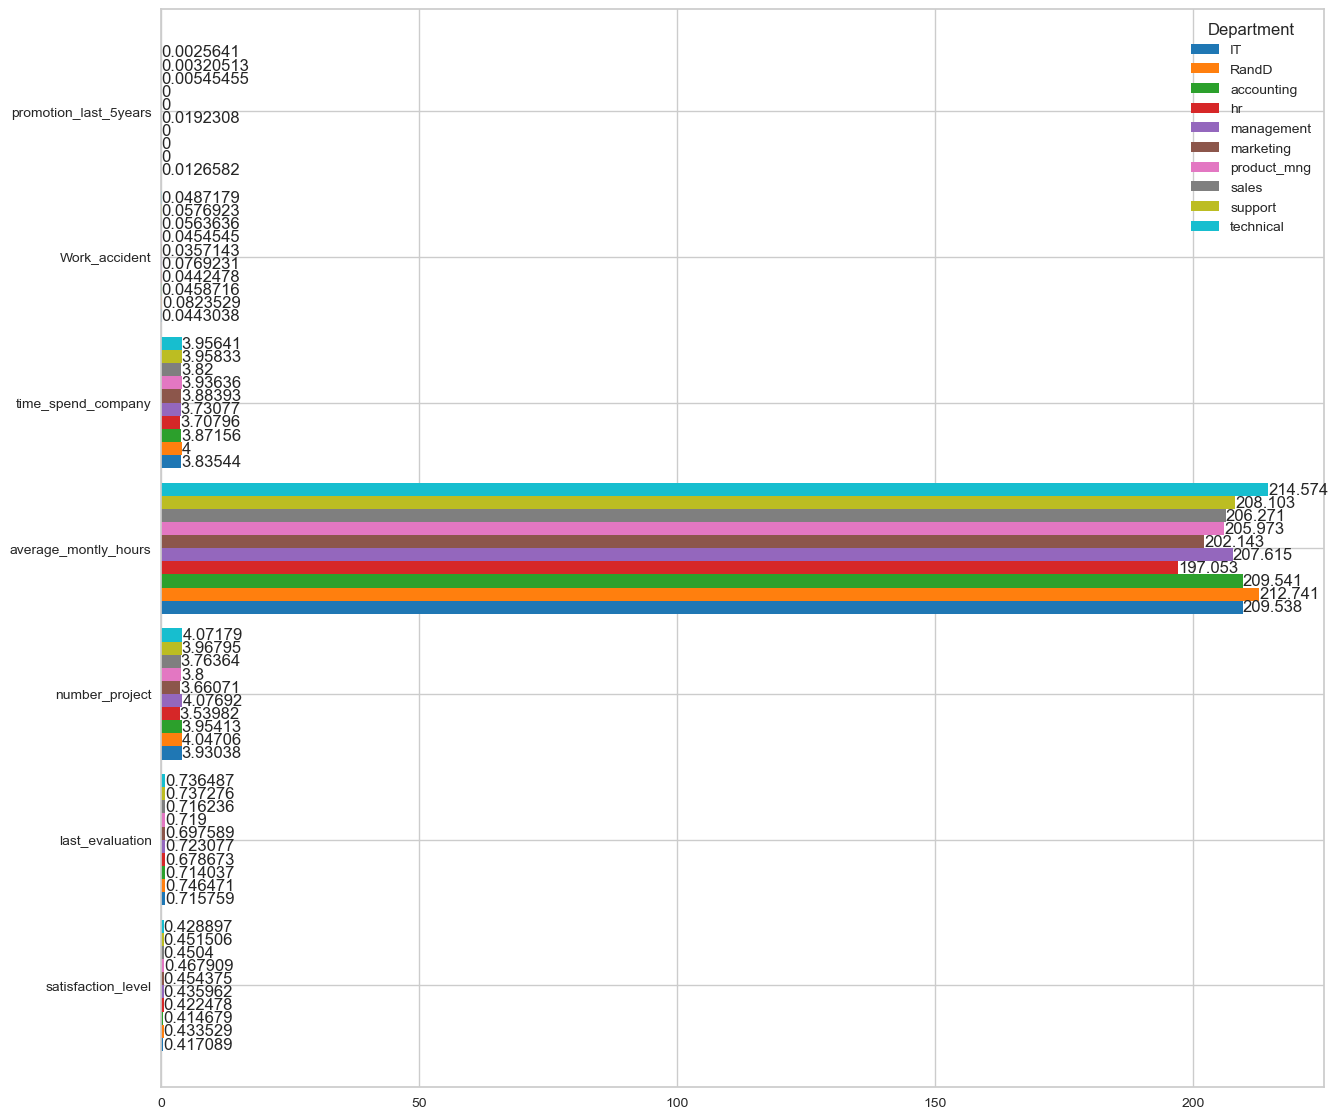

In [ ]:
ax = df_left.groupby("Department")[["satisfaction_level", "last_evaluation", "number_project", "average_montly_hours", "time_spend_company", "Work_accident", "promotion_last_5years"]].mean().T.plot(kind="barh", figsize=(15,14), width=0.9,
                                                                                                                                                                                                       color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
for i in ax.containers:
 ax.bar_label(i)

In [ ]:
# from the average_monthly_hours it seems that hr have the lowest average so from previous figures most of them should have 2 project
# from the average_monthly_hours it seems that technical have the highest average so from previous figures most of them should have 6 or 7 project

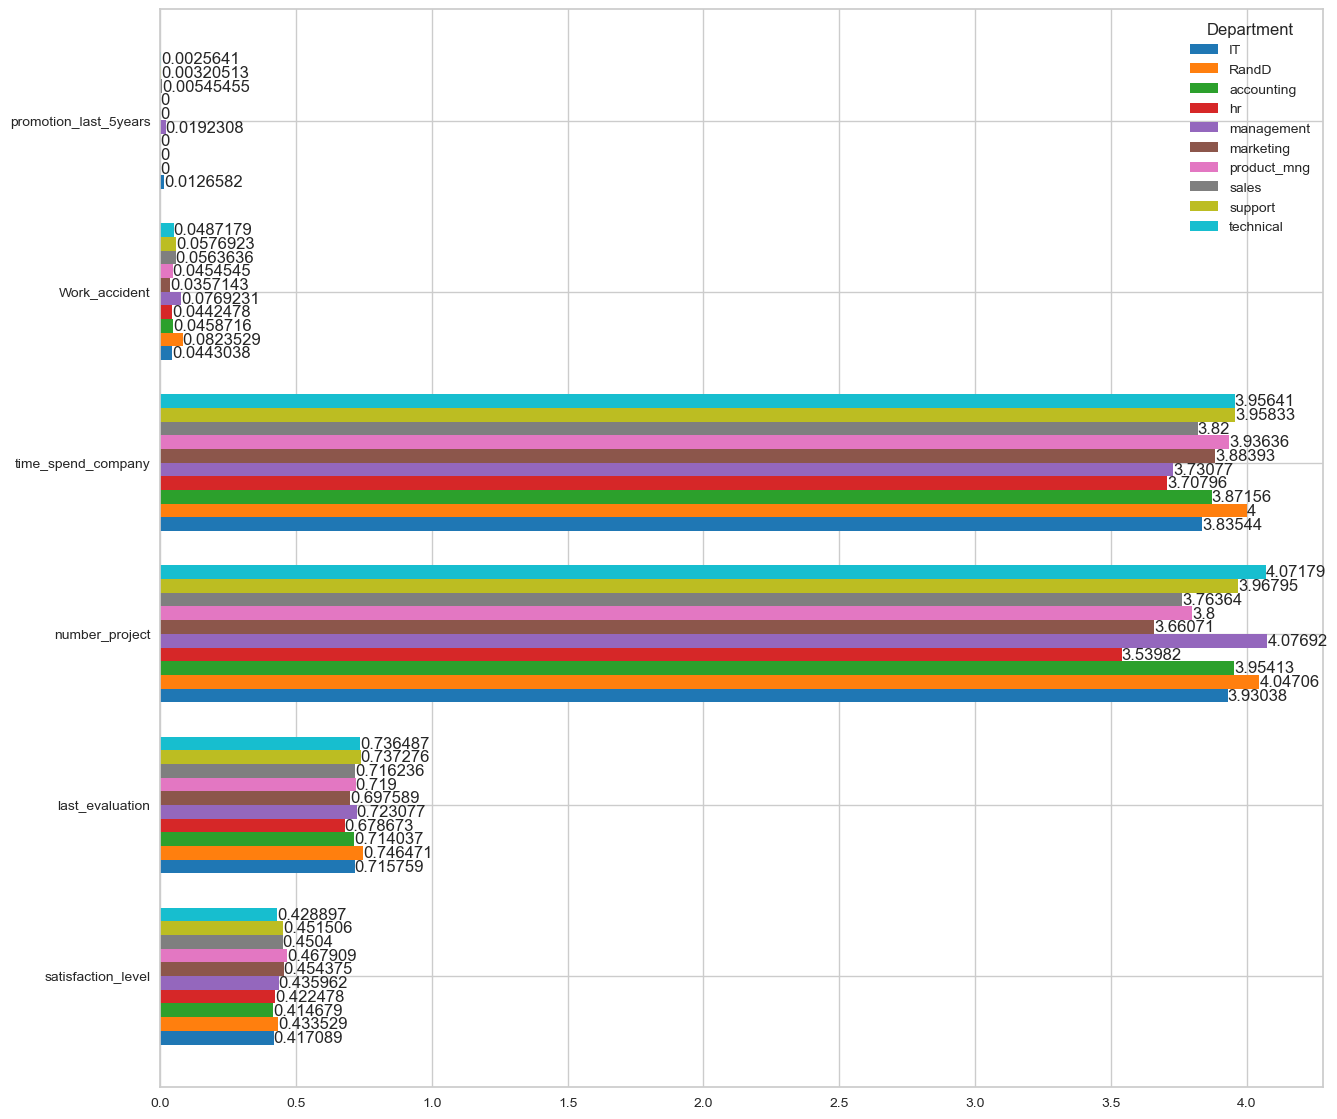

In [ ]:
ax = df_left.groupby("Department")[["satisfaction_level", "last_evaluation", "number_project", "time_spend_company", "Work_accident", "promotion_last_5years"]].mean().T.plot(kind="barh", figsize=(15,14), width=0.8,
                                                                                                                                                                              color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
for i in ax.containers:
 ax.bar_label(i)

In [ ]:
# from the number_project it seams that management is the highest even though it doesn't have the highest monthly_average_hours so from previous figures they most likely they have high 5 and 6 project

In [ ]:
departmet_s_l = df_left.groupby("Department")["salary"].value_counts().rename("count").reset_index()

In [ ]:
departmet_s_l = departmet_s_l.pivot(index="Department", columns="salary", values="count")

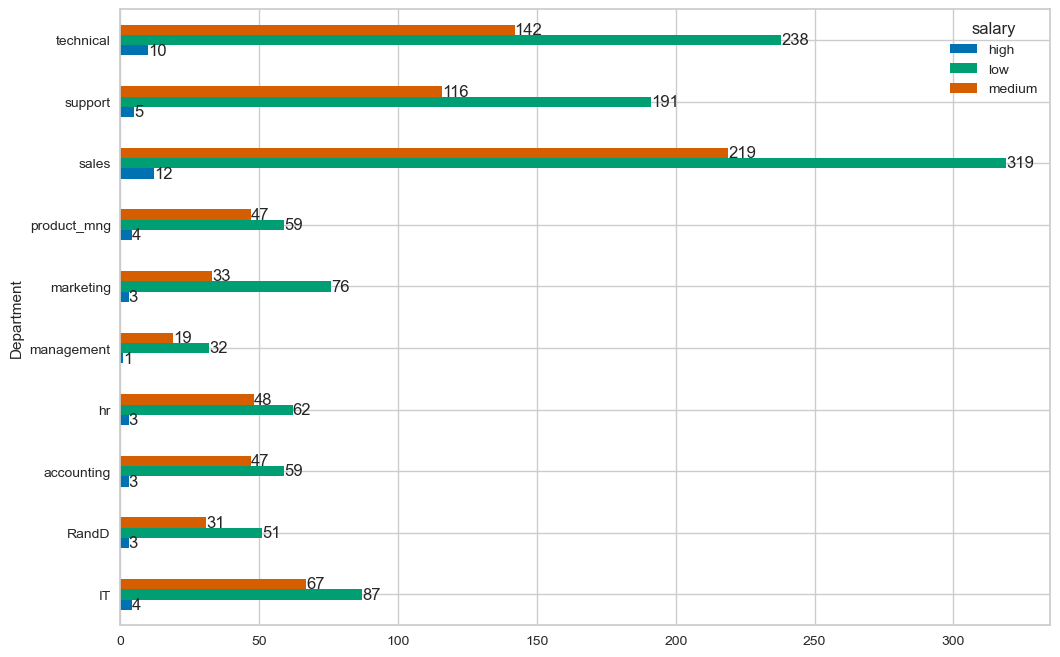

In [ ]:
ax = departmet_s_l.plot(kind="barh", figsize=(12, 8))
for i in ax.containers:
 ax.bar_label(i)

In [ ]:
# marketing medium salary is lower then half of the low salary

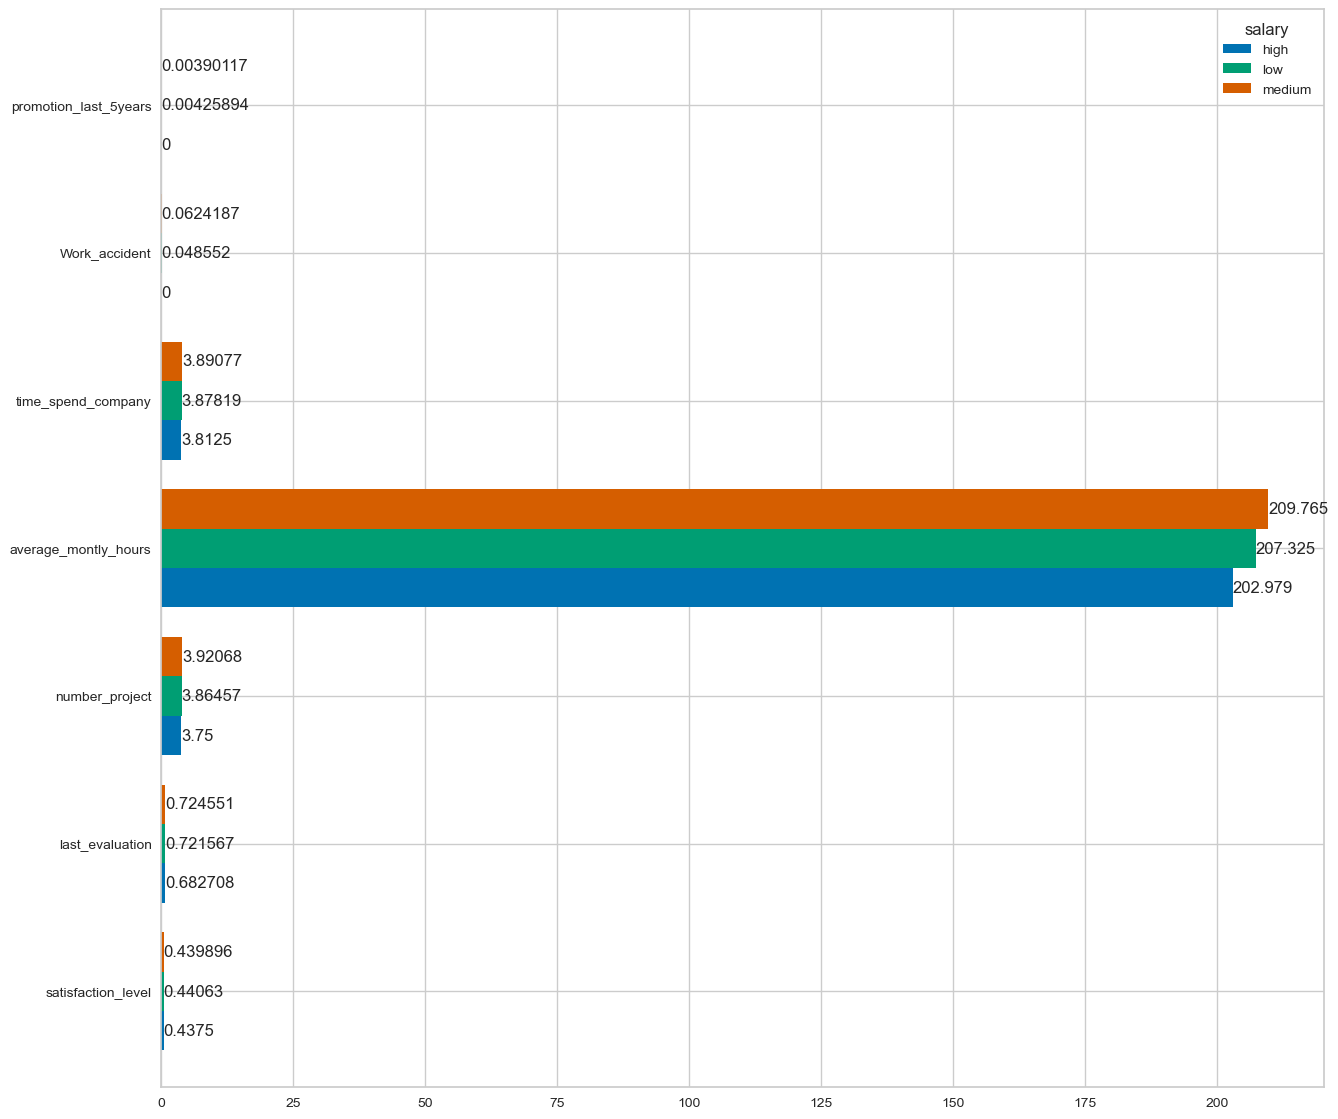

In [ ]:
ax = df_left.groupby("salary")[["satisfaction_level", "last_evaluation", "number_project", "average_montly_hours", "time_spend_company", "Work_accident", "promotion_last_5years"]].mean().T.plot(kind="barh", figsize=(15,14), width=0.8)
for i in ax.containers:
 ax.bar_label(i)

In [ ]:
# from average_monthly_hours it seams that the high salary are the lowest average_monthly_hours

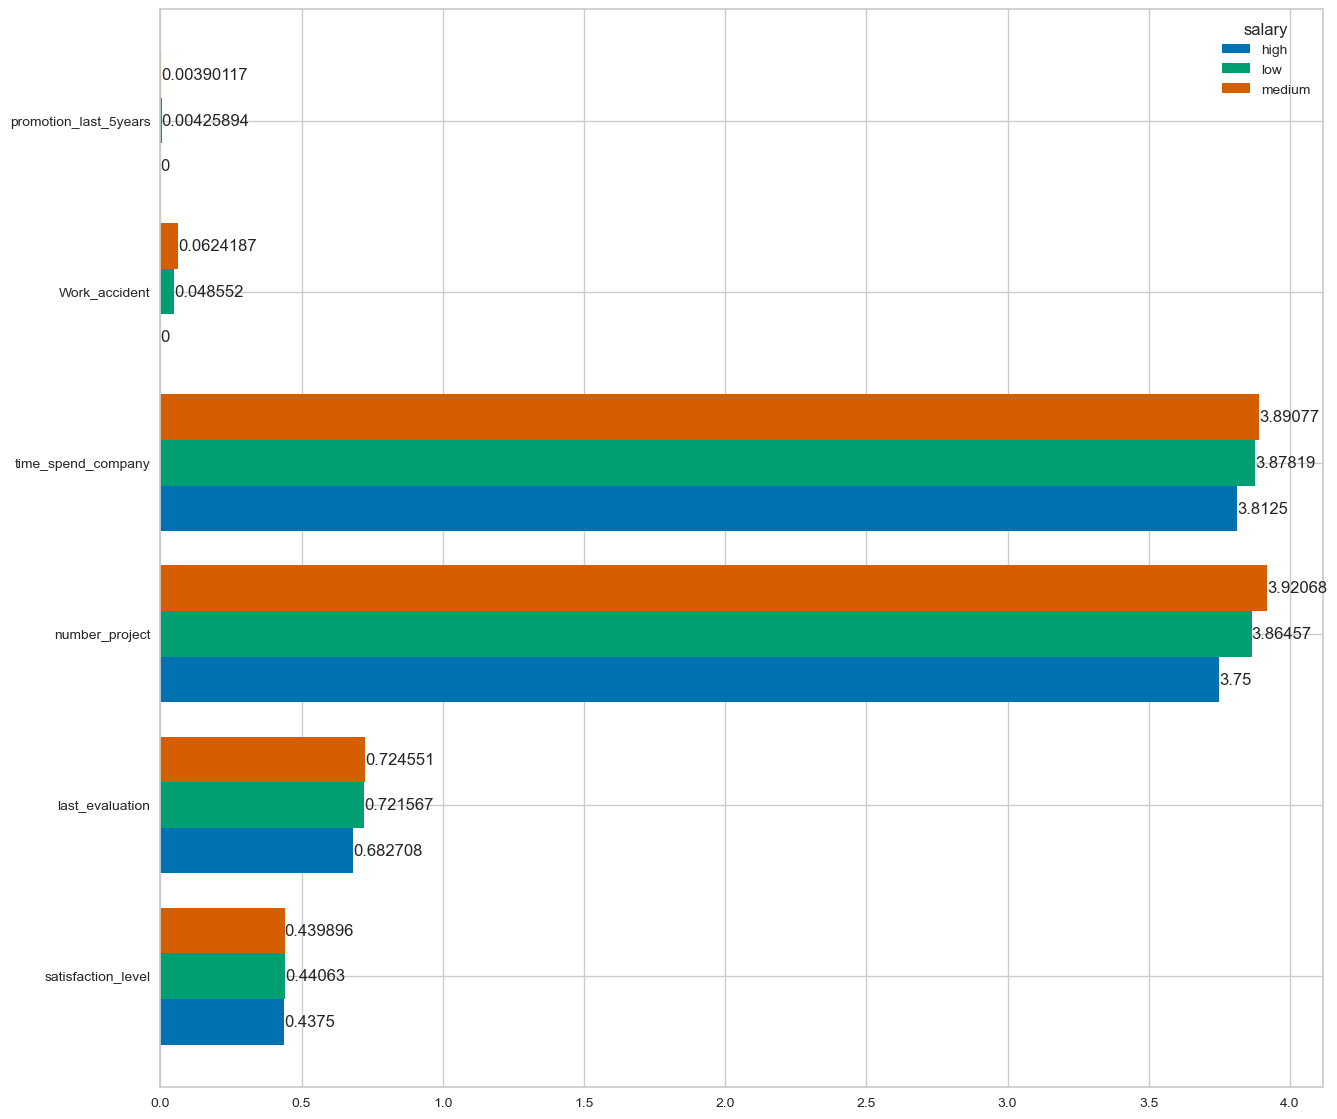

In [ ]:
ax = df_left.groupby("salary")[["satisfaction_level", "last_evaluation", "number_project", "time_spend_company", "Work_accident", "promotion_last_5years"]].mean().T.plot(kind="barh", figsize=(15,14), width=0.8)
for i in ax.containers:
 ax.bar_label(i)

In [ ]:
# it seams that the high salary have the lowest values at everything
# they might be working less and have high salaries

## 4. Cluster Analysis

In [ ]:
# will be using satisfaction_level and last_evaluation for clustering
df_cluster = df_left[["satisfaction_level", "last_evaluation"]]

In [ ]:
hopkins(df_cluster, 0.5)

0.956856579808022

In [ ]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k,
                   random_state=SEED)
    model.fit(df_cluster)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

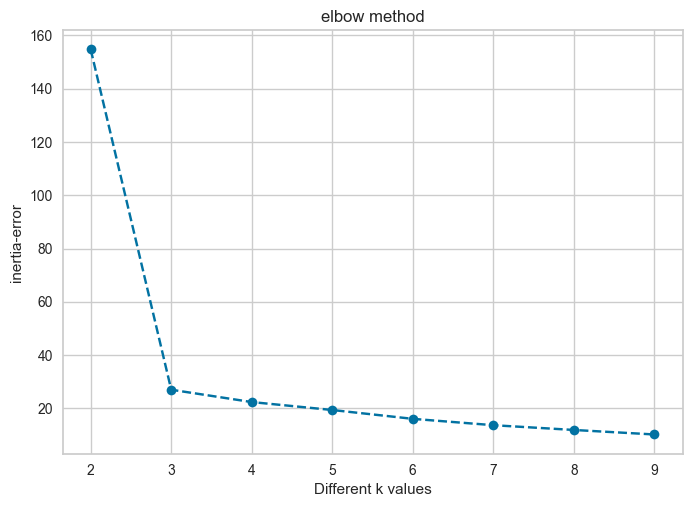

In [ ]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")

In [ ]:
K = range(2, 10)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=SEED)
    kmeanModel.fit(df_cluster)
    distances = kmeanModel.transform(df_cluster)
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i]
        result.append(np.mean(cluster_distances ** 2))
    distortion.append(sum(result))

Text(0.5, 1.0, 'elbow method')

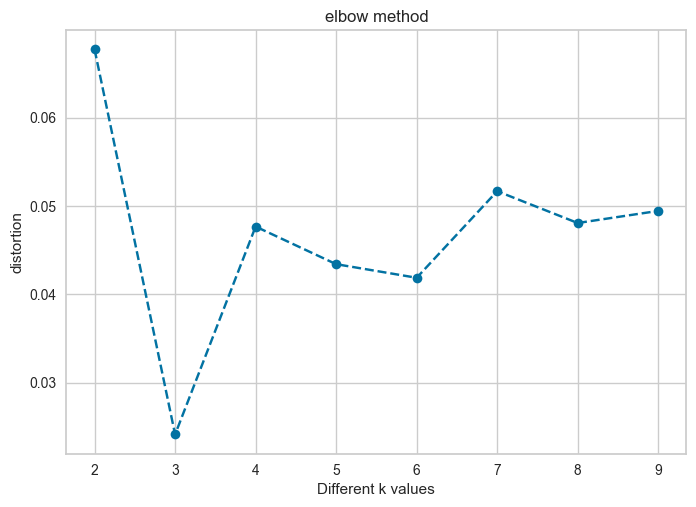

In [ ]:
plt.plot(K, distortion, "bo--")
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")

In [ ]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters,
                    random_state=SEED)
    kmeans.fit(df_cluster)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df_cluster, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.6307483779314941
For n_clusters=3, the silhouette score is 0.7961185064563238
For n_clusters=4, the silhouette score is 0.7383525700167203
For n_clusters=5, the silhouette score is 0.6436420323436515
For n_clusters=6, the silhouette score is 0.6106682802646035
For n_clusters=7, the silhouette score is 0.6007217443540982
For n_clusters=8, the silhouette score is 0.4103443866562537


In [ ]:
# best n_clusters is 3

In [ ]:
model_k = KMeans(n_clusters=3, random_state=SEED)

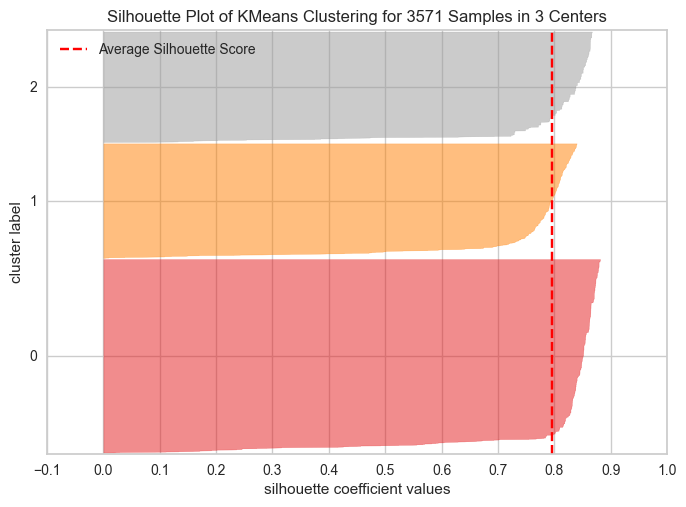

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 3571 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
visualizer = SilhouetteVisualizer(model_k)

visualizer.fit(df_cluster)    # Fit the data to the visualizer
visualizer.poof()

In [ ]:
df_cluster["Cluster"] = model_k.labels_

In [ ]:
df_cluster

satisfaction_level  last_evaluation  Cluster
0                    0.38             0.53        0
1                    0.80             0.86        1
2                    0.11             0.88        2
3                    0.72             0.87        1
4                    0.37             0.52        0
...                   ...              ...      ...
14994                0.40             0.57        0
14995                0.37             0.48        0
14996                0.37             0.53        0
14997                0.11             0.96        2
14998                0.37             0.52        0

[3571 rows x 3 columns]

In [ ]:
centers = model_k.cluster_centers_

In [ ]:
centers

array([[0.41014545, 0.51698182],
       [0.80851586, 0.91170931],
       [0.11115466, 0.86930085]])

Text(0, 0.5, 'Evaluation')

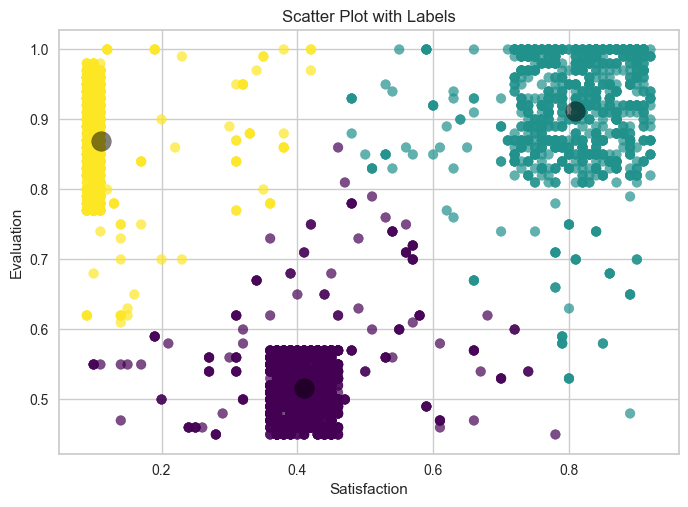

In [ ]:
plt.scatter(df_cluster["satisfaction_level"],
            df_cluster["last_evaluation"],
            c=df_cluster.Cluster,
            cmap="viridis",
            alpha=0.7)  # X.predicted_clusters
plt.scatter(centers[:, 0],
            centers[:, 1],
            c='black',
            s=200,
            alpha=0.5)
plt.title('Scatter Plot with Labels')
plt.xlabel('Satisfaction')
plt.ylabel('Evaluation')

In [ ]:
df_cluster["Cluster"].value_counts()

Cluster
0    1650
1     977
2     944
Name: count, dtype: int64

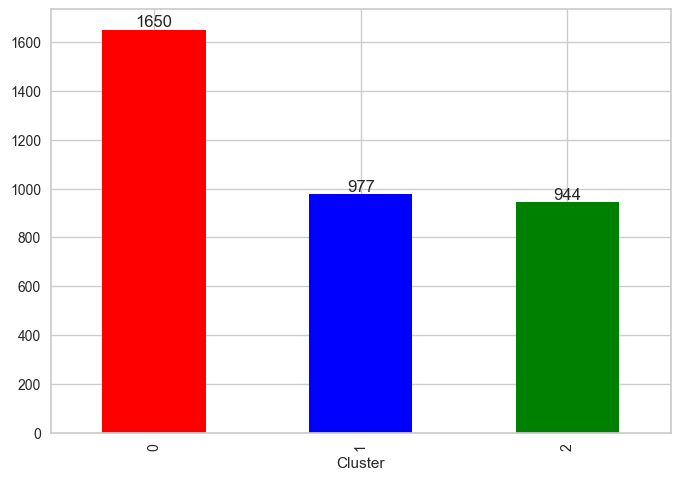

In [ ]:
ax = df_cluster["Cluster"].value_counts().plot(kind="bar", color=['red', 'blue', 'green'])
for i in ax.containers:
 ax.bar_label(i)

<Axes: xlabel='Cluster', ylabel='last_evaluation'>

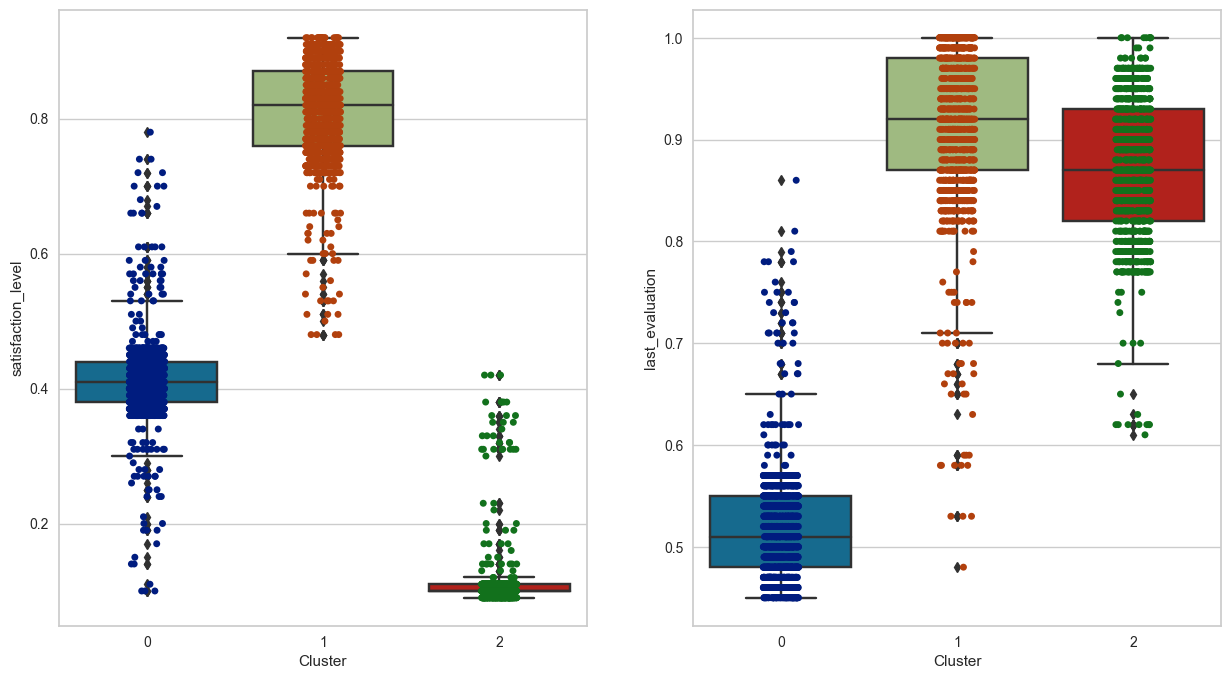

In [ ]:
plt.figure(figsize = (15,8))

plt.subplot(121)
sns.boxplot(y = "satisfaction_level", x = "Cluster", data = df_cluster)
sns.stripplot(y = "satisfaction_level", x = "Cluster", data = df_cluster, palette="dark")

plt.subplot(122)
sns.boxplot(y = "last_evaluation", x = "Cluster", data = df_cluster)
sns.stripplot(y = "last_evaluation", x = "Cluster", data = df_cluster, palette="dark")

In [ ]:
# 1 have both highest evaluation and satisfaction which means they are hardworking and happy employees (good/happy)
# 0 have mid to low satisfaction and the lowest evaluation means they are bad and unhappy employees (bad/unhappy)
# 2 have the worse satisfaction and a high evaluation which means they are hardworking and unhappy employees (good/unhappy)

In [ ]:
df_cluster["Cluster"] = df_cluster.Cluster.map({0:"bad/unhappy", 2:"good/unhappy", 1:"good/happy"})

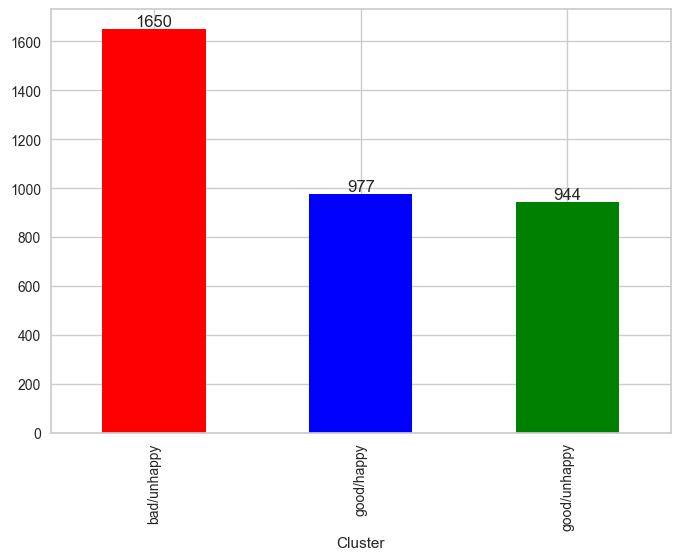

In [ ]:
ax = df_cluster["Cluster"].value_counts().plot(kind="bar", color=['red', 'blue', 'green'])
for i in ax.containers:
 ax.bar_label(i)

In [ ]:
# most of who leave are bad/unhappy
# since we saw that the higher the number of projcet the higher the evaluation, good/unhappy they may be exhausted by the high workload
# good/happy is the best employees

## 5. Predictive Model Building

### Preprocessing

In [ ]:
X = df.drop(columns=["left"])
y = df.left

In [ ]:
print('''
Shape of X is  : {}
Shape of Y is  : {}
Shape of df is : {}'''.format(X.shape,y.shape,df.shape))


Shape of X is  : (11991, 9)
Shape of Y is  : (11991,)
Shape of df is : (11991, 10)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=SEED, stratify=y)

In [ ]:
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X, y, test_size=0.15, random_state=SEED, stratify=y)

In [ ]:
X_train_d, X_val_d, y_train_d, y_val_d = train_test_split(X_train_d, y_train_d, test_size=0.15, random_state=SEED, stratify= y_train_d)

In [ ]:
cat = df.select_dtypes("object").columns
cat

Index(['Department', 'salary'], dtype='object')

In [ ]:
df["Department"].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [ ]:
df["salary"].unique()

array(['low', 'medium', 'high'], dtype=object)

In [ ]:
column_trans = make_column_transformer(
    (OneHotEncoder(), ["Department"]),
    (OrdinalEncoder(categories=[['low', 'medium', 'high']]), ["salary"]),
    remainder=StandardScaler(),
    verbose_feature_names_out=False,
)

In [ ]:
column_trans_t = make_column_transformer(
    (OrdinalEncoder(), cat),
    remainder=StandardScaler(),
    verbose_feature_names_out=False,
)

In [ ]:
# log, knn
X_train_m = column_trans.fit_transform(X_train)
X_test_m = column_trans.transform(X_test)

In [ ]:
# random forest, xgboost
X_train_t = column_trans_t.fit_transform(X_train)
X_test_t = column_trans_t.transform(X_test)

In [ ]:
# deep learning
X_train_d = column_trans.fit_transform(X_train_d)
X_test_d = column_trans.transform(X_test_d)
X_val_d = column_trans.transform(X_val_d)

### Classification Algorithms
 - Try at least 4 ML/DL algorithms.

#### Model Building

##### Logistic Regression

In [ ]:
log= LogisticRegression(max_iter=10000, random_state= SEED)

In [ ]:
log.fit(X_train_m, y_train)

LogisticRegression(max_iter=10000, random_state=101)

In [ ]:
eval_metric(log, X_train_m, y_train, X_test_m, y_test)

Test_Set
[[1442   58]
 [ 238   61]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1500
           1       0.51      0.20      0.29       299

    accuracy                           0.84      1799
   macro avg       0.69      0.58      0.60      1799
weighted avg       0.80      0.84      0.80      1799


Train_Set
[[8164  336]
 [1372  320]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      8500
           1       0.49      0.19      0.27      1692

    accuracy                           0.83     10192
   macro avg       0.67      0.57      0.59     10192
weighted avg       0.79      0.83      0.80     10192



##### cross-validation

In [ ]:
log_c = LogisticRegression(max_iter=10000, random_state= SEED)

In [ ]:
scores = cross_validate(log_c, X_train_m, y_train, scoring=['precision','recall','f1','accuracy'], cv=10, return_train_score=True)

In [ ]:
df_scores = pd.DataFrame(scores, index = range(1,11))
df_scores.mean()[2:]

test_precision     0.480866
train_precision    0.488255
test_recall        0.183822
train_recall       0.189651
test_f1            0.265527
train_f1           0.273135
test_accuracy      0.831340
train_accuracy     0.832516
dtype: float64

##### gridsearch

In [ ]:
logreg = LogisticRegression()

In [ ]:
# Define the parameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Penalty term
    'max_iter': [50,100.150,200,250,300,350,400, 1000, 10000],
    'solver' : ['saga','lbfgs'],
    "class_weight": ["balanced", None]
}

In [ ]:
log_model_grid = GridSearchCV(
    logreg,
    param_grid,
    scoring="recall",
    cv=10,
    n_jobs=-1,
    return_train_score=True,
)

In [ ]:
log_model_grid.fit(X_train_m, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced', None],
                         'max_iter': [50, 100.15, 200, 250, 300, 350, 400, 1000,
                                      10000],
                         'penalty': ['l1', 'l2'], 'solver': ['saga', 'lbfgs']},
             return_train_score=True, scoring='recall')

In [ ]:
eval_metric(log_model_grid, X_train_m, y_train, X_test_m, y_test)

Test_Set
[[1175  325]
 [  55  244]]
              precision    recall  f1-score   support

           0       0.96      0.78      0.86      1500
           1       0.43      0.82      0.56       299

    accuracy                           0.79      1799
   macro avg       0.69      0.80      0.71      1799
weighted avg       0.87      0.79      0.81      1799


Train_Set
[[6447 2053]
 [ 288 1404]]
              precision    recall  f1-score   support

           0       0.96      0.76      0.85      8500
           1       0.41      0.83      0.55      1692

    accuracy                           0.77     10192
   macro avg       0.68      0.79      0.70     10192
weighted avg       0.87      0.77      0.80     10192



In [ ]:
# Get the best parameters
best_params = log_model_grid.best_params_

# Get the best model
best_model_log = log_model_grid.best_estimator_

In [ ]:
best_model_log

LogisticRegression(C=0.1, class_weight='balanced', max_iter=50, penalty='l1',
                   solver='saga')

In [ ]:
best_params

{'C': 0.1,
 'class_weight': 'balanced',
 'max_iter': 50,
 'penalty': 'l1',
 'solver': 'saga'}

In [ ]:
pd.DataFrame(log_model_grid.cv_results_).loc[
    log_model_grid.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score     0.825061
mean_train_score    0.828868
Name: 144, dtype: object

In [ ]:
best_model_log.fit(X_train_m, y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=50, penalty='l1',
                   solver='saga')

In [ ]:
eval_metric(best_model_log, X_train_m, y_train, X_test_m, y_test)

Test_Set
[[1175  325]
 [  55  244]]
              precision    recall  f1-score   support

           0       0.96      0.78      0.86      1500
           1       0.43      0.82      0.56       299

    accuracy                           0.79      1799
   macro avg       0.69      0.80      0.71      1799
weighted avg       0.87      0.79      0.81      1799


Train_Set
[[6447 2053]
 [ 288 1404]]
              precision    recall  f1-score   support

           0       0.96      0.76      0.85      8500
           1       0.41      0.83      0.55      1692

    accuracy                           0.77     10192
   macro avg       0.68      0.79      0.70     10192
weighted avg       0.87      0.77      0.80     10192



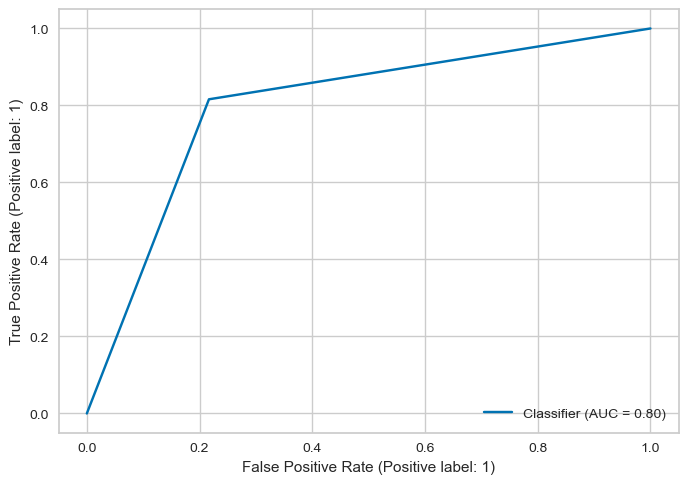

In [ ]:
y_pred = best_model_log.predict(X_test_m)
RocCurveDisplay.from_predictions(y_test, y_pred)

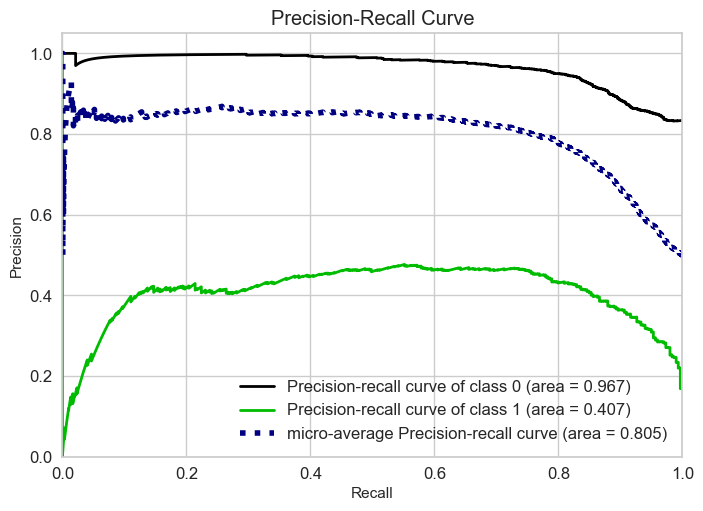

In [ ]:
y_pred_proba = best_model_log.predict_proba(X_test_m)
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
log_precision = precision_score(y_test, y_pred)  # Calculate precision
log_f1 = f1_score(y_test, y_pred)  # Calculate F1-score
log_recall = recall_score(y_test, y_pred) # Calculate recall

##### KNN

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)

knn_model.fit(X_train_m, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
eval_metric(knn_model, X_train_m, y_train, X_test_m, y_test)

Test_Set
[[1451   49]
 [  26  273]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1500
           1       0.85      0.91      0.88       299

    accuracy                           0.96      1799
   macro avg       0.92      0.94      0.93      1799
weighted avg       0.96      0.96      0.96      1799


Train_Set
[[8367  133]
 [ 142 1550]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8500
           1       0.92      0.92      0.92      1692

    accuracy                           0.97     10192
   macro avg       0.95      0.95      0.95     10192
weighted avg       0.97      0.97      0.97     10192



In [ ]:
test_error_rates = []


for k in range(1,10):

    knn_model = KNeighborsClassifier(n_neighbors=k)

    scores = cross_validate(knn_model, X_train_m, y_train, scoring = ['recall'], cv = 10)

    accuracy_mean = scores["test_recall"].mean()

    test_error = 1 - accuracy_mean

    test_error_rates.append(test_error)

Text(0, 0.5, 'Error Rate')

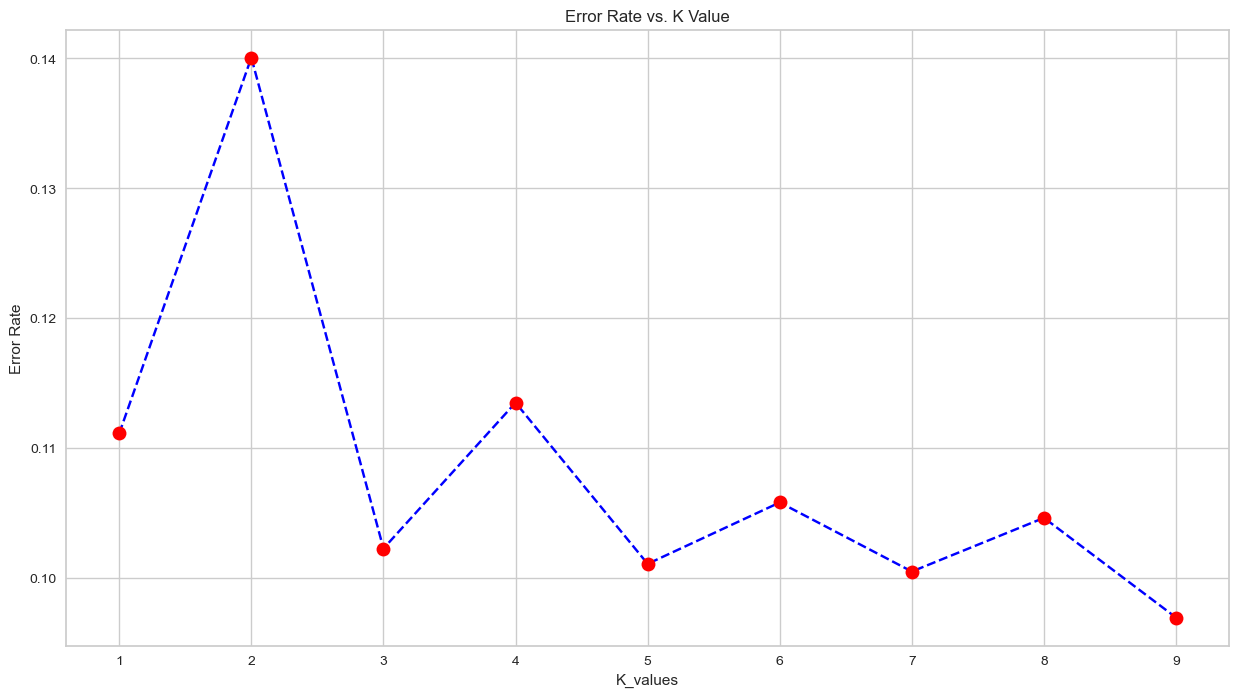

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(range(1,10), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
# plt.hlines(y=0.074, xmin=0, xmax=30, colors='r', linestyles="--")
# plt.hlines(y=0.069, xmin=0, xmax=30, colors='r', linestyles="--");

##### Overfitting and underfitting control for k values

In [ ]:
test_error_rates = []
train_error_rates = []


for k in range(1,10):

    knn_model = KNeighborsClassifier(n_neighbors=k)

    knn_model.fit(X_train_m,y_train)

    scores = cross_validate(knn_model, X_train_m, y_train, scoring=['recall'], cv=10, return_train_score=True)

    accuracy_test_mean = scores["test_recall"].mean()
    accuracy_train_mean = scores["train_recall"].mean()


    test_error = 1 - accuracy_test_mean
    train_error = 1 - accuracy_train_mean
    test_error_rates.append(test_error)
    train_error_rates.append(train_error)

Text(0, 0.5, 'Error Rate')

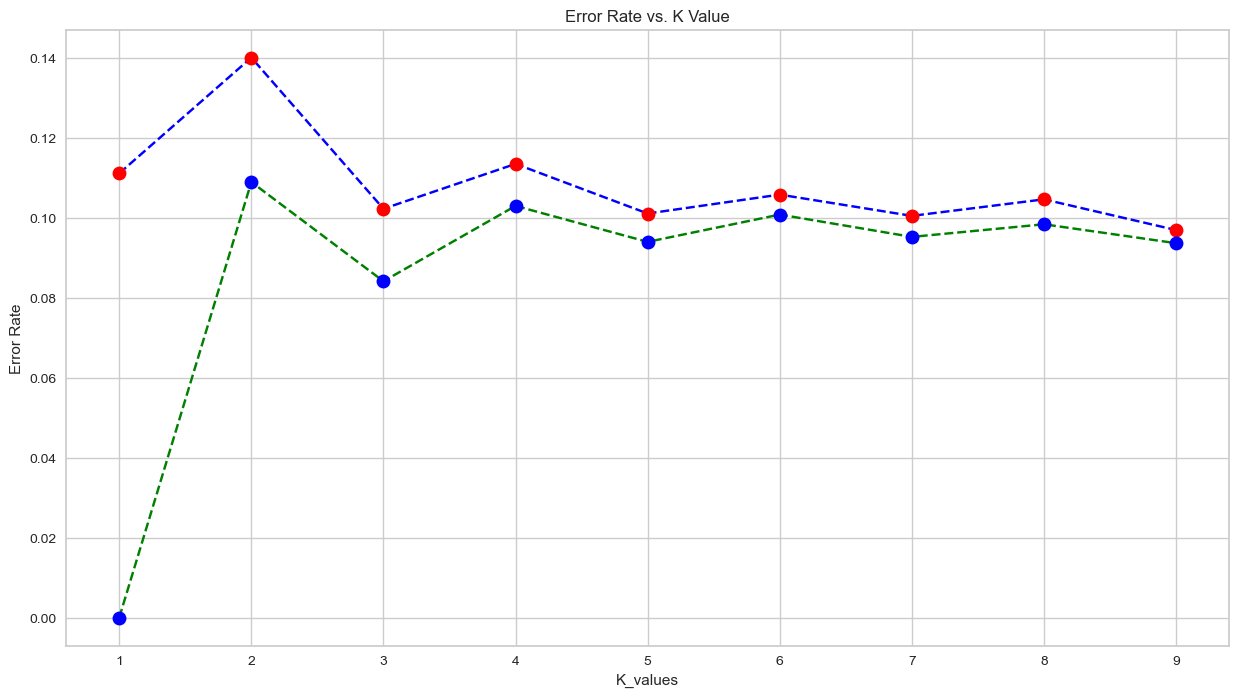

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(range(1,10), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)

plt.plot(range(1,10), train_error_rates, color='green', linestyle='--', marker='o',
         markerfacecolor='blue', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=7)

knn_model.fit(X_train_m, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
eval_metric(knn_model, X_train_m, y_train, X_test_m, y_test)

Test_Set
[[1440   60]
 [  28  271]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1500
           1       0.82      0.91      0.86       299

    accuracy                           0.95      1799
   macro avg       0.90      0.93      0.92      1799
weighted avg       0.95      0.95      0.95      1799


Train_Set
[[8268  232]
 [ 162 1530]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      8500
           1       0.87      0.90      0.89      1692

    accuracy                           0.96     10192
   macro avg       0.92      0.94      0.93     10192
weighted avg       0.96      0.96      0.96     10192



##### cross-validation

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=7)


In [ ]:
scores = cross_validate(knn_model,
                        X_train_m,
                        y_train,
                        scoring=['accuracy',
                                 'precision',
                                 'recall',
                                 'f1'],
                        cv=10,
                        return_train_score=True)


In [ ]:
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.954571
train_accuracy     0.960808
test_precision     0.839861
train_precision    0.865294
test_recall        0.899527
train_recall       0.904781
test_f1            0.868334
train_f1           0.884596
dtype: float64

##### gridsearch

In [ ]:
knn_model = KNeighborsClassifier()

In [ ]:
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
k_values= range(3,10)

In [ ]:
param_grid = {"n_neighbors":k_values, "p": [1.1, 1.3, 1.5, 1.7, 2], "weights": ['uniform', 'distance']}

# most important hyperparameters for KNN:
# 1. n_neighbors (In binary classification, choose k as an odd number to avoid ties. In multiclass classification, it doesn't matter.)
# 2. weights
# 3. p

In [ ]:
knn_grid_model = GridSearchCV(knn_model, param_grid, cv=10, n_jobs=-1, scoring="recall", return_train_score=True)

In [ ]:
knn_grid_model.fit(X_train_m, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=7), n_jobs=-1,
             param_grid={'n_neighbors': range(3, 10),
                         'p': [1.1, 1.3, 1.5, 1.7, 2],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='recall')

In [ ]:
eval_metric(knn_grid_model, X_train_m, y_train, X_test_m, y_test)

Test_Set
[[1446   54]
 [  30  269]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1500
           1       0.83      0.90      0.86       299

    accuracy                           0.95      1799
   macro avg       0.91      0.93      0.92      1799
weighted avg       0.96      0.95      0.95      1799


Train_Set
[[8500    0]
 [   0 1692]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8500
           1       1.00      1.00      1.00      1692

    accuracy                           1.00     10192
   macro avg       1.00      1.00      1.00     10192
weighted avg       1.00      1.00      1.00     10192



In [ ]:
# Get the best parameters
best_params = knn_grid_model.best_params_

# Get the best model
best_model_knn = knn_grid_model.best_estimator_

In [ ]:
best_model_knn

KNeighborsClassifier(n_neighbors=9, p=1.1, weights='distance')

In [ ]:
best_params

{'n_neighbors': 9, 'p': 1.1, 'weights': 'distance'}

In [ ]:
pd.DataFrame(knn_grid_model.cv_results_).loc[knn_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.904257
mean_train_score         1.0
Name: 61, dtype: object

In [ ]:
best_model_knn= KNeighborsClassifier(n_neighbors=7)

In [ ]:
best_model_knn.fit(X_train_m, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
eval_metric(best_model_knn, X_train_m, y_train, X_test_m, y_test)

Test_Set
[[1440   60]
 [  28  271]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1500
           1       0.82      0.91      0.86       299

    accuracy                           0.95      1799
   macro avg       0.90      0.93      0.92      1799
weighted avg       0.95      0.95      0.95      1799


Train_Set
[[8268  232]
 [ 162 1530]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      8500
           1       0.87      0.90      0.89      1692

    accuracy                           0.96     10192
   macro avg       0.92      0.94      0.93     10192
weighted avg       0.96      0.96      0.96     10192



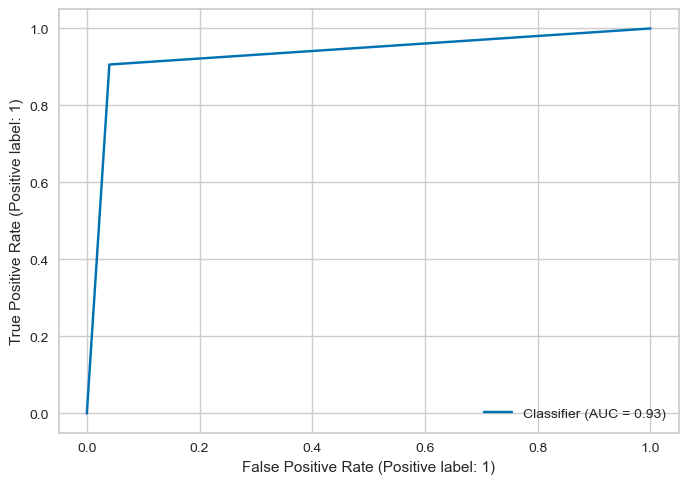

In [ ]:
y_pred = best_model_knn.predict(X_test_m)
RocCurveDisplay.from_predictions(y_test, y_pred)

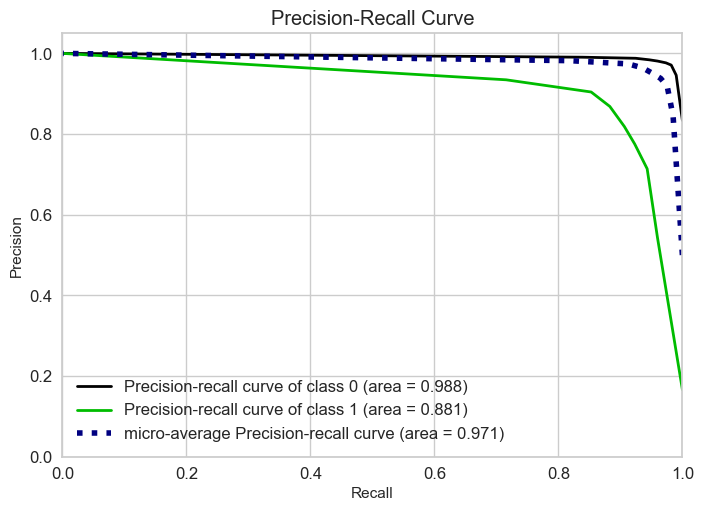

In [ ]:
y_pred_proba = best_model_knn.predict_proba(X_test_m)
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
knn_precision = precision_score(y_test, y_pred)  # Calculate precision
knn_f1 = f1_score(y_test, y_pred)  # Calculate F1-score
knn_recall = recall_score(y_test, y_pred) # Calculate recall

##### Random Forest

In [ ]:
RF_model = RandomForestClassifier(random_state=101)

In [ ]:
RF_model.fit(X_train_t, y_train)

RandomForestClassifier(random_state=101)

In [ ]:
eval_metric(RF_model, X_train_t, y_train, X_test_t, y_test)

Test_Set
[[1498    2]
 [  19  280]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1500
           1       0.99      0.94      0.96       299

    accuracy                           0.99      1799
   macro avg       0.99      0.97      0.98      1799
weighted avg       0.99      0.99      0.99      1799


Train_Set
[[8500    0]
 [   2 1690]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8500
           1       1.00      1.00      1.00      1692

    accuracy                           1.00     10192
   macro avg       1.00      1.00      1.00     10192
weighted avg       1.00      1.00      1.00     10192



##### cross-validation

In [ ]:
RF_model_c = RandomForestClassifier(random_state=101)


In [ ]:
scores = cross_validate(RF_model_c,
                        X_train_t,
                        y_train,
                        scoring=["accuracy",
                                 "precision",
                                 "recall",
                                 "f1"],
                        cv = 10,
                        return_train_score=True)


In [ ]:
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.984301
train_accuracy     0.999869
test_precision     0.989246
train_precision    1.000000
test_recall        0.915482
train_recall       0.999212
test_f1            0.950884
train_f1           0.999606
dtype: float64

##### gridsearch

In [ ]:
# Create RandomForestRegressor
RF_model_GS = RandomForestClassifier(random_state=101)


In [ ]:

# Define the parameter grid
param_grid = {"n_estimators":[100,300,500],
              "max_depth":[7,10,15, None],
              "max_features": [8,10,15, "sqrt"],
              "min_samples_split": [2,4,6,8]}


In [ ]:

# Create GridSearchCV
grid_search = GridSearchCV(estimator=RF_model_GS, param_grid=param_grid, cv=5, scoring="recall", n_jobs=-1, return_train_score=True)


In [ ]:

# Fit the model
grid_search.fit(X_train_t, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [7, 10, 15, None],
                         'max_features': [8, 10, 15, 'sqrt'],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [100, 300, 500]},
             return_train_score=True, scoring='recall')

In [ ]:
eval_metric(grid_search, X_train_t, y_train, X_test_t, y_test)

Test_Set
[[1495    5]
 [  17  282]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1500
           1       0.98      0.94      0.96       299

    accuracy                           0.99      1799
   macro avg       0.99      0.97      0.98      1799
weighted avg       0.99      0.99      0.99      1799


Train_Set
[[8489   11]
 [ 100 1592]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8500
           1       0.99      0.94      0.97      1692

    accuracy                           0.99     10192
   macro avg       0.99      0.97      0.98     10192
weighted avg       0.99      0.99      0.99     10192



In [ ]:
# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_model_rf = grid_search.best_estimator_

In [ ]:
best_model_rf

RandomForestClassifier(max_depth=10, max_features=10, n_estimators=300,
                       random_state=101)

In [ ]:
best_params

{'max_depth': 10,
 'max_features': 10,
 'min_samples_split': 2,
 'n_estimators': 300}

In [ ]:
pd.DataFrame(grid_search.cv_results_).loc[
    grid_search.best_index_, ["mean_test_score", "mean_train_score"]
]


mean_test_score     0.918437
mean_train_score    0.944296
Name: 61, dtype: object

In [ ]:
best_model_rf.fit(X_train_t, y_train)

RandomForestClassifier(max_depth=10, max_features=10, n_estimators=300,
                       random_state=101)

In [ ]:
eval_metric(best_model_rf, X_train_t, y_train, X_test_t, y_test)

Test_Set
[[1495    5]
 [  17  282]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1500
           1       0.98      0.94      0.96       299

    accuracy                           0.99      1799
   macro avg       0.99      0.97      0.98      1799
weighted avg       0.99      0.99      0.99      1799


Train_Set
[[8489   11]
 [ 100 1592]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8500
           1       0.99      0.94      0.97      1692

    accuracy                           0.99     10192
   macro avg       0.99      0.97      0.98     10192
weighted avg       0.99      0.99      0.99     10192



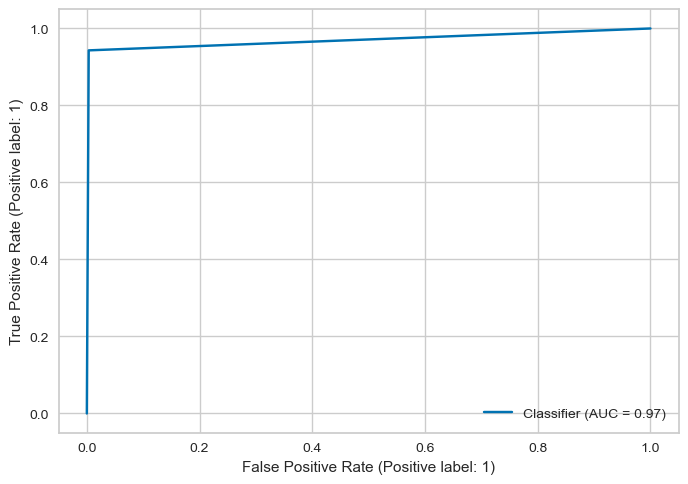

In [ ]:
y_pred = best_model_rf.predict(X_test_t)
RocCurveDisplay.from_predictions(y_test, y_pred)

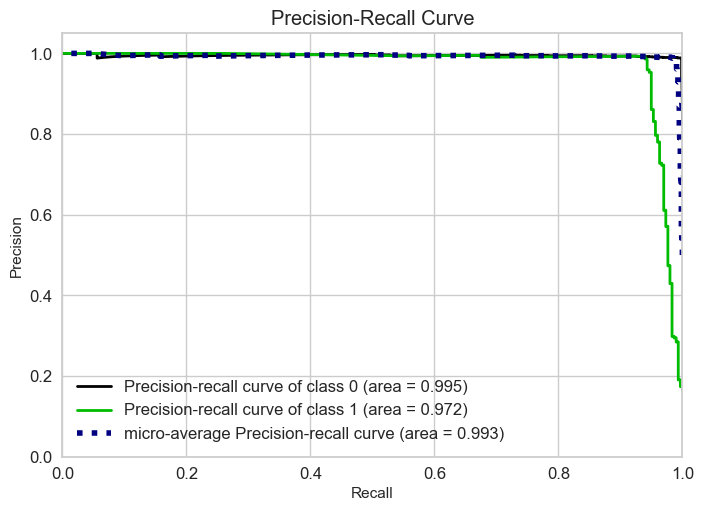

In [ ]:
y_pred_proba = best_model_rf.predict_proba(X_test_t)
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
rf_precision = precision_score(y_test, y_pred)  # Calculate precision
rf_f1 = f1_score(y_test, y_pred)  # Calculate F1-score
rf_recall = recall_score(y_test, y_pred) # Calculate recall

##### XGBoost

In [ ]:
xgboost_model = XGBClassifier(random_state=SEED)
xgboost_model.fit(X_train_t, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=101, ...)

In [ ]:
eval_metric(xgboost_model, X_train_t, y_train, X_test_t, y_test)

Test_Set
[[1494    6]
 [  18  281]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1500
           1       0.98      0.94      0.96       299

    accuracy                           0.99      1799
   macro avg       0.98      0.97      0.98      1799
weighted avg       0.99      0.99      0.99      1799


Train_Set
[[8494    6]
 [  41 1651]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8500
           1       1.00      0.98      0.99      1692

    accuracy                           1.00     10192
   macro avg       1.00      0.99      0.99     10192
weighted avg       1.00      1.00      1.00     10192



##### cross-validation

In [ ]:
model = XGBClassifier(random_state=SEED)

In [ ]:
scores = cross_validate(model,
                        X_train_t,
                        y_train,
                        scoring=['accuracy',
                                 'precision',
                                 'recall',
                                 'f1'],
                        cv = 10,
                        return_train_score=True)

In [ ]:
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.982830
train_accuracy     0.996555
test_precision     0.978150
train_precision    0.996868
test_recall        0.917250
train_recall       0.982335
test_f1            0.946634
train_f1           0.989547
dtype: float64

##### gridsearch

In [ ]:
xgb_model = XGBClassifier(random_state=SEED)

In [ ]:
param_grid = {"n_estimators":[50, 100, 200],
              'max_depth':[3,4,5],
              "learning_rate": [0.1, 0.2],
              "subsample":[0.5, 0.8, 1],
              "colsample_bytree":[0.5,0.7, 1]}

In [ ]:
xgb_grid = GridSearchCV(estimator=xgb_model,
                        param_grid=param_grid,
                        scoring="recall",
                        n_jobs=-1,
                        return_train_score=True)

In [ ]:
xgb_grid.fit(X_train_t, y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=101, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.7, 1],
                         'learning_rate': [0.1, 0.2], 'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.5, 0.8, 1]},
             return_train_score=True, scoring='recall')

In [ ]:
eval_metric(xgb_grid, X_train_t, y_train, X_test_t, y_test)

Test_Set
[[1489   11]
 [  18  281]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1500
           1       0.96      0.94      0.95       299

    accuracy                           0.98      1799
   macro avg       0.98      0.97      0.97      1799
weighted avg       0.98      0.98      0.98      1799


Train_Set
[[8468   32]
 [ 122 1570]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8500
           1       0.98      0.93      0.95      1692

    accuracy                           0.98     10192
   macro avg       0.98      0.96      0.97     10192
weighted avg       0.98      0.98      0.98     10192



In [ ]:
# Get the best parameters and best estimator
best_params = xgb_grid.best_params_
best_model_xgb = xgb_grid.best_estimator_

In [ ]:
best_model_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=101, ...)

In [ ]:
best_params

{'colsample_bytree': 0.5,
 'learning_rate': 0.2,
 'max_depth': 3,
 'n_estimators': 200,
 'subsample': 0.8}

In [ ]:
pd.DataFrame(xgb_grid.cv_results_).loc[
    grid_search.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.917846
mean_train_score    0.924202
Name: 61, dtype: object

In [ ]:
best_model_xgb.fit(X_train_t, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=101, ...)

In [ ]:
eval_metric(best_model_xgb, X_train_t, y_train, X_test_t, y_test)

Test_Set
[[1489   11]
 [  18  281]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1500
           1       0.96      0.94      0.95       299

    accuracy                           0.98      1799
   macro avg       0.98      0.97      0.97      1799
weighted avg       0.98      0.98      0.98      1799


Train_Set
[[8468   32]
 [ 122 1570]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8500
           1       0.98      0.93      0.95      1692

    accuracy                           0.98     10192
   macro avg       0.98      0.96      0.97     10192
weighted avg       0.98      0.98      0.98     10192



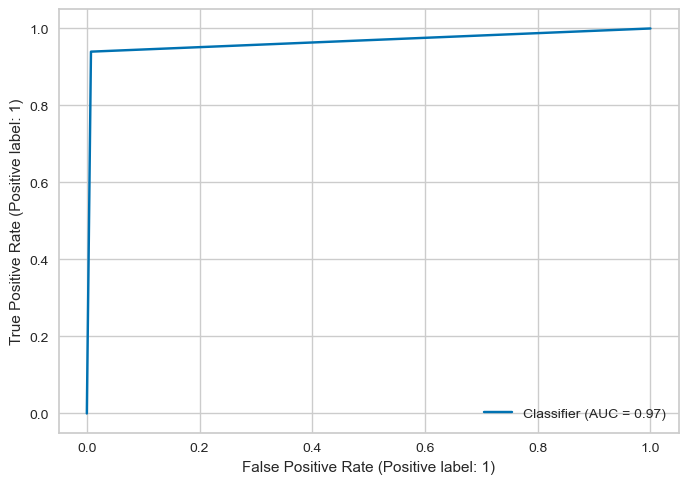

In [ ]:
y_pred = best_model_xgb.predict(X_test_t)
RocCurveDisplay.from_predictions(y_test, y_pred)

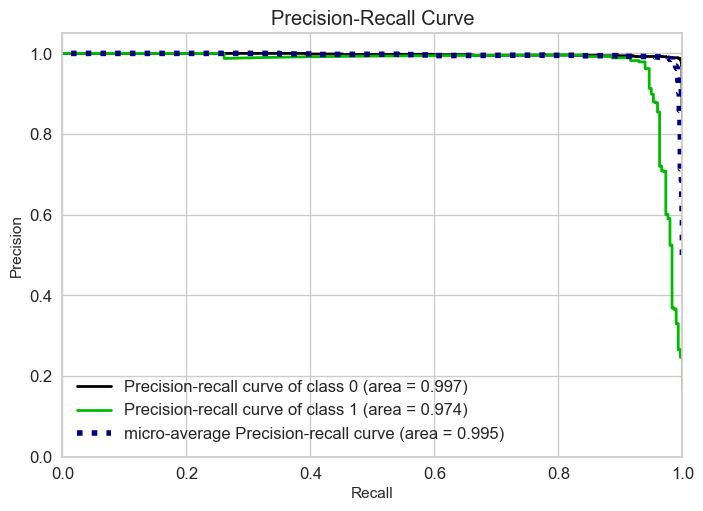

In [ ]:
y_pred_proba = best_model_xgb.predict_proba(X_test_t)
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
xgb_precision = precision_score(y_test, y_pred)  # Calculate precision
xgb_f1 = f1_score(y_test, y_pred)  # Calculate F1-score
xgb_recall = recall_score(y_test, y_pred) # Calculate recall

##### Deep Learning

In [ ]:
model = Sequential()

model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.001)
model.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=["Recall", "Accuracy"])

In [ ]:
early_stop = EarlyStopping(monitor="val_recall",
                           mode="max",
                           verbose=1,
                           patience=8,
                           restore_best_weights=True)

In [ ]:
model.fit(x=X_train_d,
          y=y_train_d,
          validation_data=(X_val_d, y_val_d),
          batch_size=32,
          epochs=200,
          verbose=1,
          callbacks=[early_stop])

Epoch 1/200
271/271 [==============================] - 1s 2ms/step - loss: 0.4156 - recall: 0.0549 - Accuracy: 0.8166 - val_loss: 0.3024 - val_recall: 0.1654 - val_Accuracy: 0.8476
Epoch 2/200
271/271 [==============================] - 0s 1ms/step - loss: 0.2509 - recall: 0.5473 - Accuracy: 0.8975 - val_loss: 0.2090 - val_recall: 0.7835 - val_Accuracy: 0.9372
Epoch 3/200
271/271 [==============================] - 0s 1ms/step - loss: 0.1829 - recall: 0.8067 - Accuracy: 0.9442 - val_loss: 0.1645 - val_recall: 0.8661 - val_Accuracy: 0.9555
Epoch 4/200
271/271 [==============================] - 0s 1ms/step - loss: 0.1562 - recall: 0.8700 - Accuracy: 0.9568 - val_loss: 0.1461 - val_recall: 0.8740 - val_Accuracy: 0.9627
Epoch 5/200
271/271 [==============================] - 0s 1ms/step - loss: 0.1459 - recall: 0.8748 - Accuracy: 0.9589 - val_loss: 0.1376 - val_recall: 0.8976 - val_Accuracy: 0.9647
Epoch 6/200
271/271 [==============================] - 0s 1ms/step - loss: 0.1396 - recall: 0.8

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                304       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________


<Axes: >

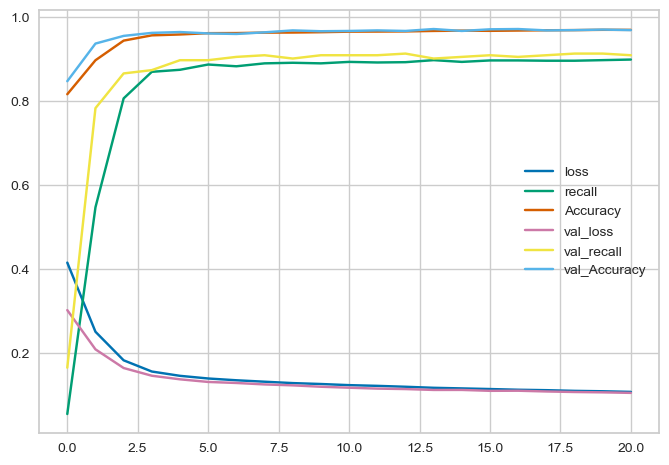

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
model.evaluate(X_train_d, y_train_d)

271/271 [==============================] - 0s 898us/step - loss: 0.1167 - recall: 0.8992 - Accuracy: 0.9661


[0.11666051298379898, 0.8991655111312866, 0.9660625457763672]

In [ ]:
eval_metric_d(model, X_train_d, y_train_d, X_test_d, y_test_d)

57/57 [==============================] - 0s 761us/step
Test_Set
[[1457   43]
 [  30  269]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1500
           1       0.86      0.90      0.88       299

    accuracy                           0.96      1799
   macro avg       0.92      0.94      0.93      1799
weighted avg       0.96      0.96      0.96      1799


Train_Set
[[7076  149]
 [ 145 1293]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7225
           1       0.90      0.90      0.90      1438

    accuracy                           0.97      8663
   macro avg       0.94      0.94      0.94      8663
weighted avg       0.97      0.97      0.97      8663



##### with weight

In [ ]:
model_w = Sequential()

model_w.add(Dense(16, activation="relu"))

model_w.add(Dense(8, activation="relu"))

model_w.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.001)
model_w.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=["Recall", "Accuracy"])

In [ ]:
early_stop = EarlyStopping(monitor="val_recall",
                           mode="max",
                           verbose=1,
                           patience=10,
                           restore_best_weights = True)

In [ ]:
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train_d),
                                                  y=y_train_d)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.599515570934256, 1: 3.0121696801112656}

In [ ]:
model_w.fit(x=X_train_d,
          y=y_train_d,
          validation_data=(X_val_d, y_val_d),
          batch_size=32,
          epochs=200,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/200
271/271 [==============================] - 1s 2ms/step - loss: 0.6330 - recall: 0.3143 - Accuracy: 0.8400 - val_loss: 0.3918 - val_recall: 0.8189 - val_Accuracy: 0.8280
Epoch 2/200
271/271 [==============================] - 0s 1ms/step - loss: 0.4221 - recall: 0.9006 - Accuracy: 0.8124 - val_loss: 0.3626 - val_recall: 0.9252 - val_Accuracy: 0.8077
Epoch 3/200
271/271 [==============================] - 0s 1ms/step - loss: 0.3224 - recall: 0.9416 - Accuracy: 0.8434 - val_loss: 0.2820 - val_recall: 0.9291 - val_Accuracy: 0.8679
Epoch 4/200
271/271 [==============================] - 0s 1ms/step - loss: 0.2593 - recall: 0.9339 - Accuracy: 0.8983 - val_loss: 0.2136 - val_recall: 0.9173 - val_Accuracy: 0.9111
Epoch 5/200
271/271 [==============================] - 0s 1ms/step - loss: 0.2322 - recall: 0.9263 - Accuracy: 0.9176 - val_loss: 0.2032 - val_recall: 0.9252 - val_Accuracy: 0.9156
Epoch 6/200
271/271 [==============================] - 0s 1ms/step - loss: 0.2204 - recall: 0.9

In [ ]:
model_w.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 16)                304       
                                                                 
 dense_25 (Dense)            (None, 8)                 136       
                                                                 
 dense_26 (Dense)            (None, 1)                 9         
                                                                 
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________


<Axes: >

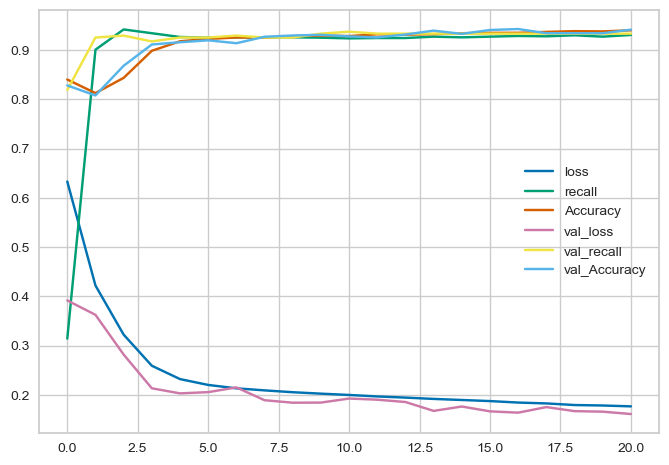

In [ ]:
loss_df = pd.DataFrame(model_w.history.history)
loss_df.plot()

In [ ]:
eval_metric_d(model_w, X_train_d, y_train_d, X_test_d, y_test_d)

57/57 [==============================] - 0s 670us/step
Test_Set
[[1391  109]
 [  20  279]]
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1500
           1       0.72      0.93      0.81       299

    accuracy                           0.93      1799
   macro avg       0.85      0.93      0.88      1799
weighted avg       0.94      0.93      0.93      1799


Train_Set
[[6703  522]
 [ 106 1332]]
              precision    recall  f1-score   support

           0       0.98      0.93      0.96      7225
           1       0.72      0.93      0.81      1438

    accuracy                           0.93      8663
   macro avg       0.85      0.93      0.88      8663
weighted avg       0.94      0.93      0.93      8663



57/57 [==============================] - 0s 715us/step


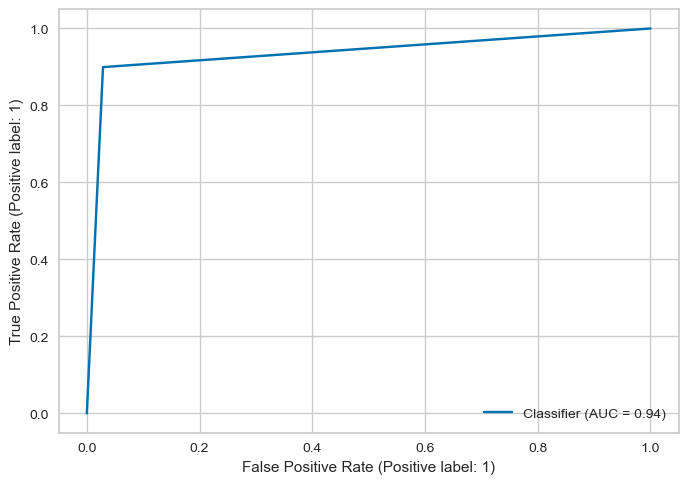

In [ ]:
y_pred = model.predict(X_test_d) >= 0.5
RocCurveDisplay.from_predictions(y_test_d, y_pred)

57/57 [==============================] - 0s 751us/step


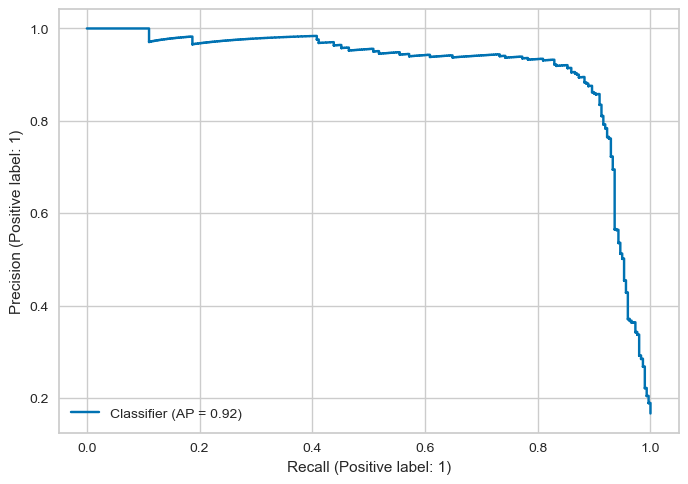

In [ ]:
y_pred_proba = model.predict(X_test_d)
PrecisionRecallDisplay.from_predictions(y_test_d, y_pred_proba)

In [ ]:
dl_precision = precision_score(y_test, y_pred)  # Calculate precision
dl_f1 = f1_score(y_test, y_pred)  # Calculate F1-score
dl_recall = recall_score(y_test, y_pred) # Calculate recall

#### Evaluating Model Performance and Tuning
- Compare model performances according to metrics you choose for the problem.

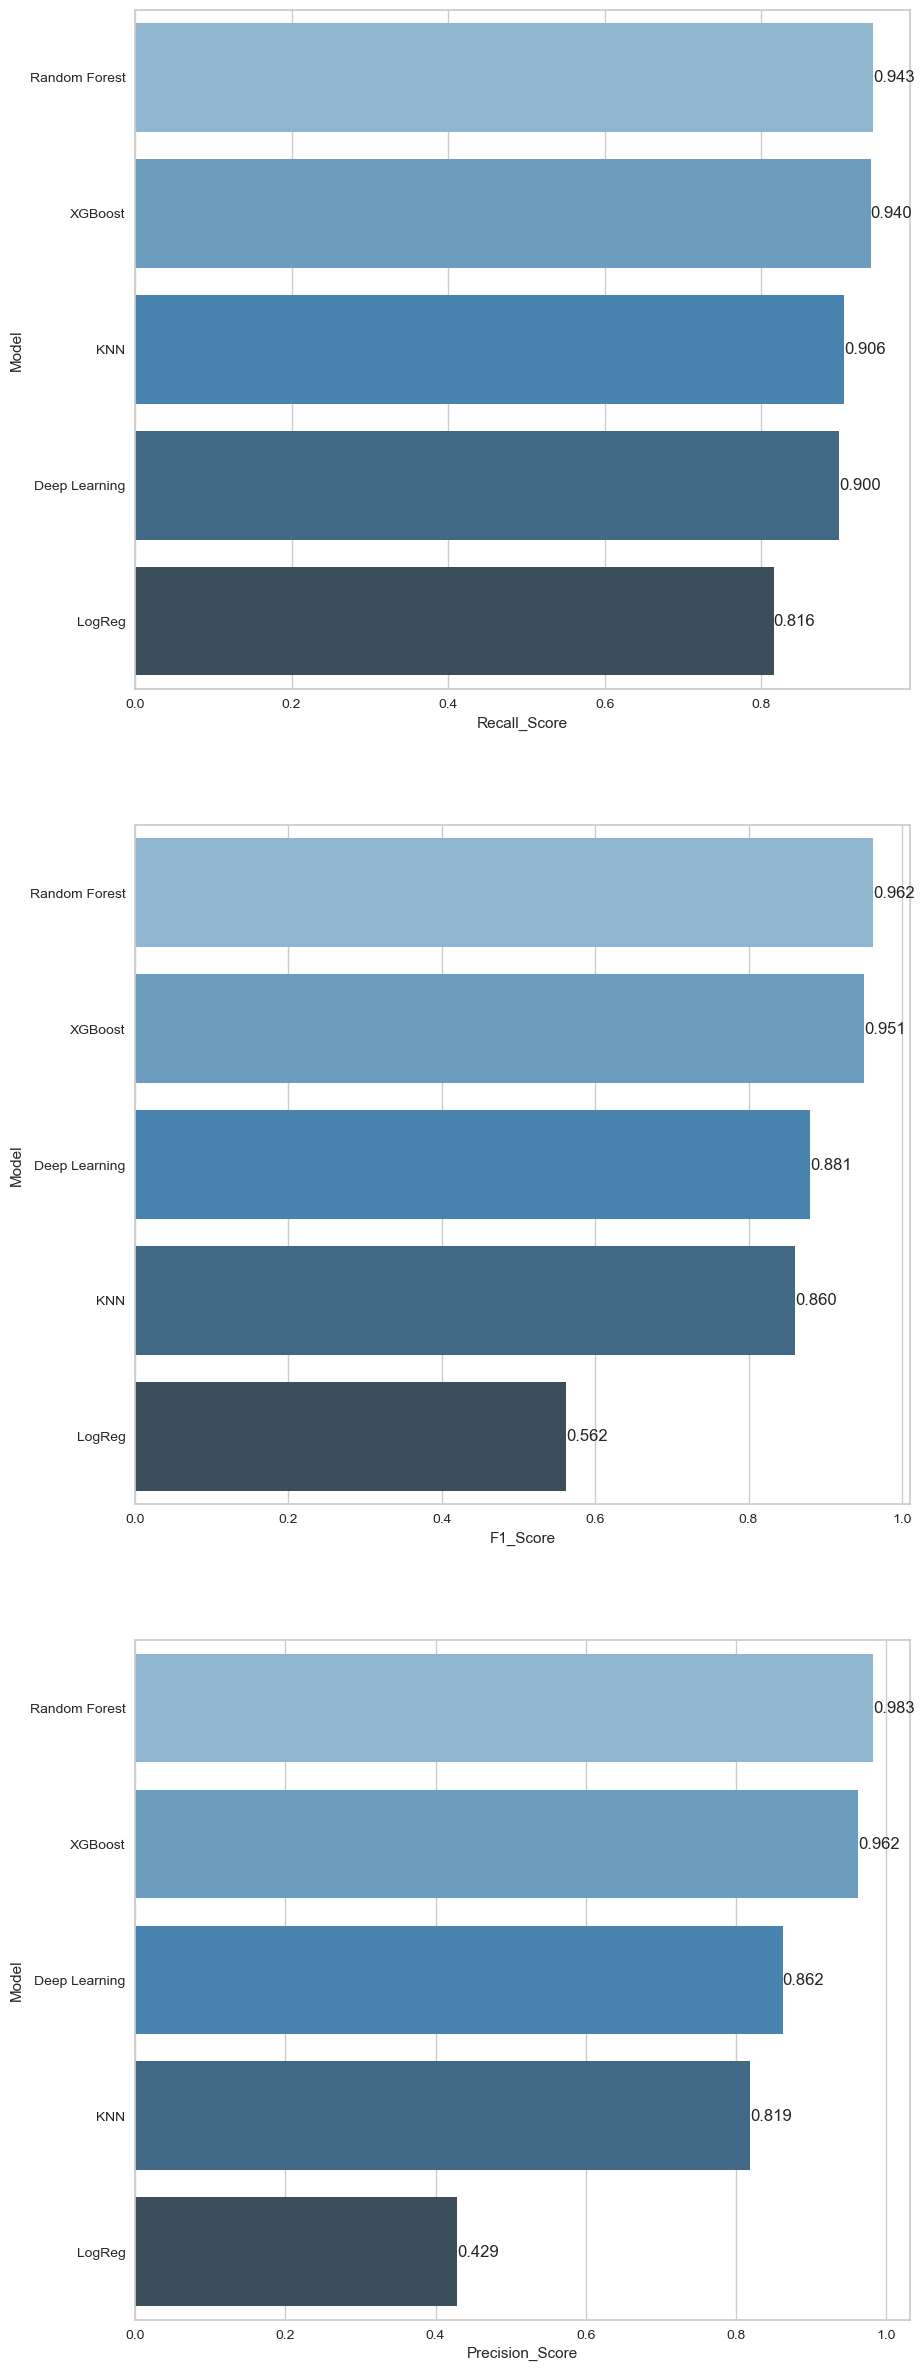

In [ ]:
compare = pd.DataFrame({"Model": ["LogReg", "KNN", "Random Forest", "XGBoost", "Deep Learning"],

                        "F1_Score": [log_f1, knn_f1, rf_f1, xgb_f1, dl_f1],

                        "Recall_Score": [log_recall, knn_recall, rf_recall, xgb_recall, dl_recall],

                        "Precision_Score": [log_precision, knn_precision, rf_precision, xgb_precision, dl_precision]})


plt.figure(figsize=(10,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score",
                              ascending=False)
ax=sns.barplot(x="Recall_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="F1_Score",
                              ascending=False)
ax=sns.barplot(x="F1_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")


plt.subplot(313)
compare = compare.sort_values(by="Precision_Score",
                              ascending=False)
ax=sns.barplot(x="Precision_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show();

####  Prediction

In [ ]:
X_final = column_trans_t.fit_transform(X)

In [ ]:
best_model_rf.fit(X_final, y)

RandomForestClassifier(max_depth=10, max_features=10, n_estimators=300,
                       random_state=101)

In [ ]:
y_pred = best_model_rf.predict(X_final)

print(confusion_matrix(y, y_pred))
print("-------------------------------------------------------")
print(classification_report(y, y_pred))

[[9986   14]
 [ 112 1879]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     10000
           1       0.99      0.94      0.97      1991

    accuracy                           0.99     11991
   macro avg       0.99      0.97      0.98     11991
weighted avg       0.99      0.99      0.99     11991



## 6. Model Deployement

You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied. Streamlit is a popular open source framework used by data scientists for model distribution.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to new .py file and create your web app with Streamlit.

### Save and Export the Best Model

In [ ]:
pickle.dump(best_model_rf, open("my_model", "wb"))

In [ ]:
pickle.dump(column_trans_t, open("transformer", "wb"))

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___